In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
from evalutils import *
from lccv import lccv

In [6]:
datasets_dense = [1485, 1515, 1475, 1468, 1489, 23512, 23517, 40981, 40982, 40983, 40984, 40701, 40685, 40900,  1111, 40498, 41161, 41162, 41163, 41164, 41165, 41166, 41167, 41168, 41169, 41142, 41143, 41144, 41145, 41146, 41150, 41156, 41157, 41158,  41159, 41138, 54, 181, 188, 1461, 1494, 1464, 12, 23, 3, 1487, 40668, 1067, 1049, 40975, 31]
#1457
datasets_sparse = [1590, 1486, 4534, 4541, 4538, 4134, 4135, 40978, 40996, 41027, 40670, 42732, 42733, 42734, 41147]
datasets = datasets_dense

In [7]:
dfResults = pd.read_csv("results_random.csv")
dfResults

,openmlid,method,time,model,performance
0,1515,lccv,653,RandomForestClassifier,0.1103
1,1515,mccv,737,RandomForestClassifier,0.1103
2,1475,lccv,831,RandomForestClassifier,0.3650
3,1475,mccv,1489,RandomForestClassifier,0.3650
4,1468,lccv,479,MLPClassifier,0.0398
5,1468,mccv,773,MLPClassifier,0.0398
6,1489,lccv,433,RandomForestClassifier,0.0821
7,1489,mccv,541,ExtraTreeClassifier,0.0799
8,23512,lccv,2319,RandomForestClassifier,0.2828
9,23512,mccv,3592,RandomForestClassifier,0.2828


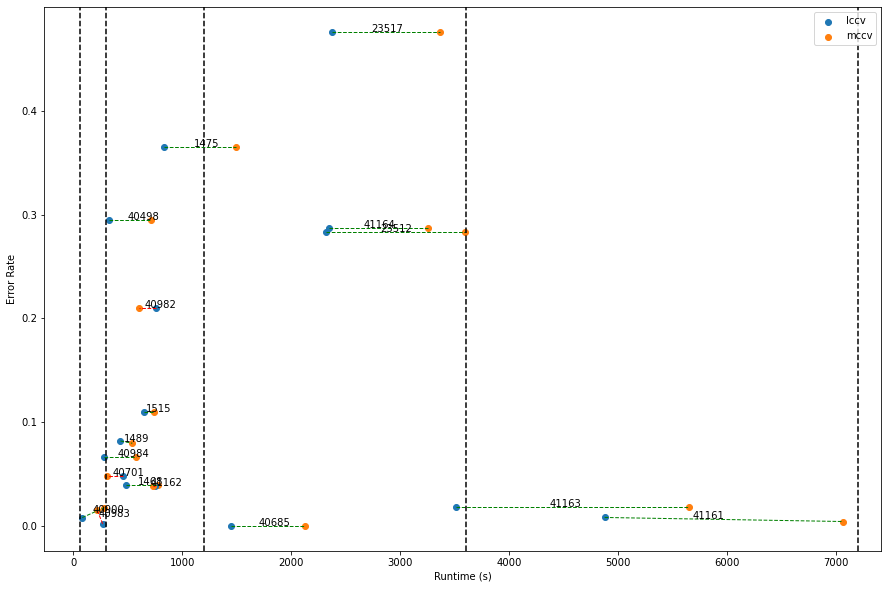

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))
i = 0
for openmlid, dfds in dfResults.groupby("openmlid"):
    lccv = dfds[dfds["method"] == "lccv"].values[0]
    mccv = dfds[dfds["method"] == "mccv"].values[0]
    ax.scatter(lccv[2], lccv[4], color="C0", label="lccv" if i == 0 else None)
    ax.scatter(mccv[2], mccv[4], color="C1", label="mccv" if i == 0 else None)
    ax.plot([lccv[2], mccv[2]], [lccv[4], mccv[4]], color="green" if lccv[2] < mccv[2] else "red", linestyle="--", linewidth=1)
    ax.text((lccv[2] + mccv[2]) / 2.1, (lccv[4] + mccv[4]) / 2, openmlid)
    i += 1
ax.set_xlabel("Runtime (s)")
ax.set_ylabel("Error Rate")
ax.axvline(60, linestyle="--", color="black")
ax.axvline(300, linestyle="--", color="black")
ax.axvline(1200, linestyle="--", color="black")
ax.axvline(3600, linestyle="--", color="black")
ax.axvline(7200, linestyle="--", color="black")
#ax.set_xscale("log")
ax.legend()

In [12]:
DOMAIN_EPS = [0.0, 0.05, 0.1, 1]
DOMAIN_TIMEOUTS = [30, 60, 300]

#combos = [u[0] + ", " + u[1] for u in it.product(["$\\varepsilon$=" + str(v) for v in DOMAIN_EPS], ["t=" + str(v) for v in DOMAIN_TIMEOUTS])]
rows = []
for openmlid in sorted(datasets):
    runtimes = list(np.round(100 * (np.random.rand(5))).astype(int))
    performances = np.round((np.random.rand(5)), 2)
    performances[performances > 0.9] = np.nan
    failed_evaluations = list(np.round(10 * (np.random.rand(5))).astype(int))
    rows.append([openmlid] + [str(performances[i]) + " (" + str(runtimes[i]) + ", " + str(failed_evaluations[i]) + ")" for i in range(len(runtimes))])
columns = ["openmlid"] + ["$LCCV_{" + str(eps) + "}$" for eps in DOMAIN_EPS] + ["$10CV$"]
print(pd.DataFrame(rows, columns=columns).to_latex(index=False, escape=False))

\begin{tabular}{rlllll}
\toprule
 openmlid &   $LCCV_{0.0}$ &  $LCCV_{0.05}$ &   $LCCV_{0.1}$ &     $LCCV_{1}$ &         $10CV$ \\
\midrule
        3 &   0.24 (3, 10) &    0.3 (77, 0) &  0.08 (85, 10) &   0.28 (72, 4) &   0.88 (53, 7) \\
       12 &   0.62 (41, 5) &   0.01 (73, 8) &   0.79 (14, 4) &   0.24 (45, 7) &   0.25 (9, 10) \\
       23 &   0.43 (22, 2) &    0.71 (6, 3) &   0.83 (76, 5) &   0.19 (61, 3) &    0.67 (5, 5) \\
       31 &   0.57 (25, 6) &   0.01 (65, 2) &   0.09 (18, 1) &   0.32 (92, 1) &   0.03 (26, 9) \\
       54 &    0.05 (2, 9) &   0.46 (14, 6) &  0.19 (23, 10) &    0.2 (91, 6) &  0.77 (100, 4) \\
      181 &     nan (7, 9) &    nan (84, 3) &   0.24 (64, 2) &   0.69 (78, 5) &   0.71 (17, 0) \\
      188 &    nan (21, 5) &    0.11 (1, 2) &    0.63 (6, 5) &   0.31 (47, 4) &   0.04 (39, 8) \\
     1049 &   0.57 (11, 2) &   0.29 (64, 1) &   0.66 (57, 9) &   0.43 (64, 5) &   0.49 (99, 8) \\
     1067 &   0.72 (15, 7) &   0.23 (27, 4) &   0.68 (43, 1) &   0.22 (73, 6

In [3]:
def evaluate_validators(validators, learners, X, y, timeout_per_evaluation, epsilon):
    out = {}
    performances = {}
    for validator, result_parser in validators:
        
        print("-------------------------------\n" + validator.__name__ + "\n-------------------------------")
        time_start = time.time()
        chosen_learner = select_model((validator, result_parser), learners, X, y, timeout_per_evaluation, epsilon)[0]
        runtime = int(np.round(time.time() - time_start))
        print("Chosen learner is " + str(chosen_learner) + ". Now computing its definitive performance.")
        if chosen_learner is None:
            out[validator.__name__] = ("n/a", runtime, np.nan)
        else:
            if not chosen_learner.__name__ in performances:
                performances[chosen_learner.__name__] = mccv(chosen_learner(), X, y, seed=4711)
            out[validator.__name__] = (chosen_learner.__name__, runtime, performances[chosen_learner.__name__])
    return out


learners = [
    (sklearn.svm.LinearSVC, {}),
    (sklearn.tree.DecisionTreeClassifier, {}),
    (sklearn.tree.ExtraTreeClassifier, {}),
    (sklearn.linear_model.LogisticRegression, {}),
    (sklearn.linear_model.PassiveAggressiveClassifier, {}),
    (sklearn.linear_model.Perceptron, {}),
    (sklearn.linear_model.RidgeClassifier, {}),
    (sklearn.linear_model.SGDClassifier, {}),
    (sklearn.neural_network.MLPClassifier, {}),
    (sklearn.discriminant_analysis.LinearDiscriminantAnalysis, {}),
    (sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis, {}),
    (sklearn.naive_bayes.BernoulliNB, {}),
    (sklearn.naive_bayes.MultinomialNB, {}),
    (sklearn.neighbors.KNeighborsClassifier, {}),
    (sklearn.ensemble.ExtraTreesClassifier, {}),
    (sklearn.ensemble.RandomForestClassifier, {}),
    (sklearn.ensemble.GradientBoostingClassifier, {})
]

In [3]:
test_learners = [l[0] for l in learners]
print(len(test_learners))
for _ in range(3):
    test_learners.extend(test_learners)
print(len(test_learners))
test_learners = random.sample(test_learners, len(test_learners))
#test_learners = [sklearn.ensemble.RandomForestClassifier, sklearn.svm.LinearSVC]
validators = [(lccv, lambda r: r[0]), (mccv, lambda r: r[0])]
epsilon = 0.0
start = False
for openmlid in tqdm(datasets_dense):
    if openmlid in [1457, 40981, 41165]:
        continue
        
    if openmlid in [1485]: # has a problem here, because the learning curve of decision trees starts to drop late (not convex!)
        continue
        
    if openmlid == 41166: # does not terminate in acceptable time. But this is very interesting, because here we get a result with lccv but not with 10cv
        continue
        
    if openmlid not in [23512, 23517, 1475, 41164, 41161]:
        continue
    if openmlid != 23517:
        continue
    
    print(validators)
    X, y = get_dataset(openmlid)
    print("dataset " + str(openmlid) + " (" + str(X.shape) + ")")
    print("90% correspond to " + str(.9 * X.shape[0]) + " instances.")
    performances = evaluate_validators(validators, test_learners, X, y, 60, epsilon)
    print(performances)

17
136


[(<function lccv at 0x7f982ecd5cb0>, <function <lambda> at 0x7f982ecdab90>), (<function mccv at 0x7f982eccbb00>, <function <lambda> at 0x7f982ecdac20>)]
dataset 23517 ((96320, 21))
90% correspond to 86688.0 instances.
-------------------------------
lccv
-------------------------------


Checking learner <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
Running LCCV on (96320, 21)-shaped data for learner SGDClassifier() with r = 1.0. Overview:
	min_exp: 6
	max_exp: 16.403544678202017
Adding point at size 64
std of [0.4919]: 0.0
Adding point at size 64
std of [0.4919 0.4862]: 0.002850000000000019
Confidence bounds for performance interval at 64: (0.48573520161202144, 0.49236479838797853). Size: 0.006629596775957092
Adding point at size 64
std of [0.4919 0.4862 0.5122]: 0.011158355115736773
Confidence bounds for performance interval at 64: (0.48617006014523684, 0.5073632731880965). Size: 0.02119321304285965
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.89676284790039s according to current belief.
Max size in timeout: 2978.208505326222
Expected runtime at that size: 59896.76284790039
Feasible target: 2978.208505326222
Settin

std of [0.5046]: 0.0
Adding point at size 22020
std of [0.5046 0.4981]: 0.003249999999999975
Confidence bounds for performance interval at 22020: (0.4975699667505508, 0.5051300332494492). Size: 0.0075600664988983435
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.66817593574524s according to current belief.
Max size in timeout: 1063410.9901099547
Expected runtime at that size: 59668.17593574523
Feasible target: 86688
Setting exponent to 16.403544678202017
Reached full dataset size. Disabling max number of evaluations (setting it to 10).
Adding point at size 86688
std of [0.49127907]: 0.0
Adding point at size 86688
std of [0.49127907 0.48837209]: 0.0014534883720930258
Confidence bounds for performance interval at 86688: (0.488135047741749, 0.49151611504894865). Size: 0.00338106730719967
GOAL NOT REACHABLE ANYMORE!
Stopping LCCV c

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4982 0.503 ]: 0.0024000000000000132
Confidence bounds for performance interval at 64: (0.4978085908311759, 0.503391409168824). Size: 0.0055828183376480656
Adding point at size 64
std of [0.4982 0.503  0.5091]: 0.004460443425888913
Confidence bounds for performance interval at 64: (0.49919744341900496, 0.5076692232476616). Size: 0.008471779828656656
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.549992084503174s according to current belief.
Max size in timeout: 1303.1464482196843
Expected runtime at that size: 59549.992084503174
Feasible target: 1303.1464482196843
Setting exponent to 10.347783508436102
Adding point at size 1303


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4968]: 0.0
Adding point at size 1303


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4968 0.5005]: 0.0018499999999999628
Confidence bounds for performance interval at 1303: (0.4964982887656982, 0.5008017112343018). Size: 0.004303422468603657
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 57.83150768280029s according to current belief.
Max size in timeout: 5865.885514239924
Expected runtime at that size: 57831.50768280031
Feasible target: 5865.885514239924
Setting exponent to 12.518133198639651
Adding point at size 5866


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4989]: 0.0
Adding point at size 5866


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4989 0.4982]: 0.00035000000000001696
Confidence bounds for performance interval at 5866: (0.49814291949621314, 0.49895708050378684). Size: 0.0008141610075736994
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 50.85516977310181s according to current belief.
Max size in timeout: 62200.13212122655
Expected runtime at that size: 50855.16977310181
Feasible target: 62200.13212122655
Setting exponent to 15.92463002438179
Adding point at size 62200
Timeouted
Estimated bounds for performance interval at 86688: (0.4990350663385224, 0.44228857127675486)
IPL Estimate for target is 0.4985321973112762.
This IS close enough for full evaluation.
Setting exponent to maximally possible in remaining time -0.019728660583496094s according to current belief.
Max size in timeout: -162.3260066844814
Expected runtime at that size: -19.72866058349

/home/felix/devel/lccv/lccv/lccv.py:389: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.5083 0.496 ]: 0.006149999999999989
Confidence bounds for performance interval at 64: (0.49499701400488844, 0.5093029859951115). Size: 0.014305971990223043
Adding point at size 64
std of [0.5083 0.496  0.5044]: 0.005132250968142525
Confidence bounds for performance interval at 64: (0.4980261235626088, 0.5077738764373912). Size: 0.009747752874782467
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.61389112472534s according to current belief.
Max size in timeout: 1416.8325230839869
Expected runtime at that size: 59613.891124725335
Feasible target: 1416.8325230839869
Setting exponent to 10.468453518997139
Adding point at size 1417
std of [0.497]: 0.0
Adding point at size 1417
std of [0.497  0.4912]: 0.0029000000000000137
Confidence bounds for performance interval at 1417: (0.49072704725433763, 0.49747295274566233). Size: 0.0067459054913247
Switching t

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5008 0.501  0.4929]: 0.0037721199462489143
Confidence bounds for performance interval at 128: (0.49465111441240434, 0.5018155522542622). Size: 0.007164437841857885
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.78312397003174s according to current belief.
Max size in timeout: 3882.5378549298666
Expected runtime at that size: 59783.12397003175
Feasible target: 3882.5378549298666
Setting exponent to 11.922784275688919
Adding point at size 3883
std of [0.4981]: 0.0
Adding point at size 3883
std of [0.4981 0.4973]: 0.00040000000000001146
Confidence bounds for performance interval at 3883: (0.49723476513852927, 0.4981652348614707). Size: 0.0009304697229414183
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in rema

/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4993]: 0.0
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4993 0.5042]: 0.0024500000000000077
Confidence bounds for performance interval at 64: (0.4989004364734921, 0.5045995635265078). Size: 0.005699127053015729
Adding point at size 64
std of [0.4993 0.5042 0.5118]: 0.005142632270215998
Confidence bounds for performance interval at 64: (0.5002162648897029, 0.509983735110297). Size: 0.009767470220594099
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.384174823760986s according to current belief.
Max size in timeout: 1112.2436015817607
Expected runtime at that size: 59384.17482376099
Feasible target: 1112.2436015817607
Setting exponent to 10.119257083789124
Adding point at size 1112


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4969]: 0.0
Adding point at size 1112


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4969 0.4948]: 0.0010499999999999954
Confidence bounds for performance interval at 1112: (0.4946287584886395, 0.4970712415113605). Size: 0.002442483022720987
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 57.43576431274414s according to current belief.
Max size in timeout: 4518.132976567713
Expected runtime at that size: 57435.76431274414
Feasible target: 4518.132976567713
Setting exponent to 12.141511017060107
Adding point at size 4518


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5015]: 0.0
Adding point at size 4518


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5015 0.498 ]: 0.0017500000000000293
Confidence bounds for performance interval at 4518: (0.49771459748106583, 0.5017854025189342). Size: 0.004070805037868386
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 50.06782841682434s according to current belief.
Max size in timeout: 50640.32457653775
Expected runtime at that size: 50067.82841682434
Feasible target: 50640.32457653775
Setting exponent to 15.627999031224487
Adding point at size 50640
Timeouted
Estimated bounds for performance interval at 86688: (0.502175331692612, 0.49732466830738803)
Impossibly reachable, stopping.
Details about stop:
Data:    trainsize  seed  error_rate  runtime
0         64     0      0.4993      185
1         64     1      0.5042      214
2         64     2      0.5118      191
3       1112     0      0.4969     1009
4       1112     1      0.494

std of [0.50332226]: 0.0
Adding point at size 86688
std of [0.50332226 0.51245847]: 0.004568106312292375
Confidence bounds for performance interval at 86688: (0.5025772596800484, 0.5132034712169615). Size: 0.010626211536913122
GOAL NOT REACHABLE ANYMORE!
Estimated bounds for performance interval at 86688: (0.5142213214567468, 0.5015594094402631)
Impossibly reachable, stopping.
Details about stop:
Data:    trainsize  seed  error_rate  runtime
0         64     0    0.493100       26
1         64     1    0.503600       27
2         64     2    0.512200       28
3       3015     0    0.491100       39
4       3015     1    0.493500       36
5      19267     0    0.495600       91
6      19267     1    0.488700       68
7      86688     0    0.503322      296
8      86688     1    0.512458      276
Normal Estimates:{64: {'n': 3, 'mean': 0.5029666666666667, 'std': 0.007810391937810949, 'conf': (0.49412853857229627, 0.5118047947610371)}, 3015: {'n': 2, 'mean': 0.4923, 'std': 0.00120000000000

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5018 0.5099]: 0.004049999999999998
Confidence bounds for performance interval at 64: (0.5011394970276095, 0.5105605029723905). Size: 0.009421005944781013
Adding point at size 64
std of [0.5018 0.5099 0.5053]: 0.0033169597860423627
Confidence bounds for performance interval at 64: (0.5025166936343041, 0.5088166396990293). Size: 0.006299946064725281
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.59910035133362s according to current belief.
Max size in timeout: 1381.1644538285725
Expected runtime at that size: 59599.10035133361
Feasible target: 1381.1644538285725
Setting exponent to 10.431669394697892
Adding point at size 1381


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4944]: 0.0
Adding point at size 1381


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4944 0.4903]: 0.0020499999999999963
Confidence bounds for performance interval at 1381: (0.48996567133496277, 0.49473432866503714). Size: 0.004768657330074366
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 57.787397623062134s according to current belief.
Max size in timeout: 6570.145092772852
Expected runtime at that size: 57787.39762306212
Feasible target: 6570.145092772852
Setting exponent to 12.681709515531233
Adding point at size 6570


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5032]: 0.0
Adding point at size 6570


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5032 0.4959]: 0.0036499999999999866
Confidence bounds for performance interval at 6570: (0.49530473188908014, 0.5037952681109198). Size: 0.00849053622183965
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 49.65560054779053s according to current belief.
Max size in timeout: 76333.1294276609
Expected runtime at that size: 49655.600547790506
Feasible target: 76333.1294276609
Setting exponent to 16.220021718228764
Adding point at size 76333
Timeouted
Estimated bounds for performance interval at 86688: (0.5046085489588763, 0.4836888488411417)
Impossibly reachable, stopping.
Details about stop:
Data:    trainsize  seed  error_rate  runtime
0         64     0      0.5018      133
1         64     1      0.5099      117
2         64     2      0.5053      134
3       1381     0      0.4944      900
4       1381     1      0.4903 

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.4976]: 0.0
Adding point at size 64
std of [0.4976 0.5104]: 0.006399999999999961
Confidence bounds for performance interval at 64: (0.4965562422164693, 0.5114437577835307). Size: 0.01488751556706136
Adding point at size 64
std of [0.4976 0.5104 0.5124]: 0.006556421788343563
Confidence bounds for performance interval at 64: (0.5005736502236228, 0.5130263497763773). Size: 0.01245269955275452
Adding point at size 128
std of [0.5008]: 0.0
Adding point at size 128
std of [0.5008 0.501 ]: 9.999999999998899e-05
Confidence bounds for performance interval at 128: (0.5007836912846324, 0.5010163087153676). Size: 0.0002326174307352158
Adding point at size 128
std of [0.5008 0.501  0.4929]: 0.0037721199462489143
Confidence bounds for performance interval at 128: (0.49465111441240434, 0.5018155522542622). Size: 0.007164437841857885
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in

std of [0.5008 0.501 ]: 9.999999999998899e-05
Confidence bounds for performance interval at 128: (0.5007836912846324, 0.5010163087153676). Size: 0.0002326174307352158
Adding point at size 128
std of [0.5008 0.501  0.4929]: 0.0037721199462489143
Confidence bounds for performance interval at 128: (0.49465111441240434, 0.5018155522542622). Size: 0.007164437841857885
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.72599267959595s according to current belief.
Max size in timeout: 3162.623190036281
Expected runtime at that size: 59725.99267959595
Feasible target: 3162.623190036281
Setting exponent to 11.62690596120991
Adding point at size 3163
std of [0.4929]: 0.0
Adding point at size 3163
std of [0.4929 0.4953]: 0.0011999999999999789
Confidence bounds for performance interval at 3163: (0.492704295415588, 0.49549570458441194). Size: 0.0027914091688239218
Switchi

std of [0.4959]: 0.0
Adding point at size 3533
std of [0.4959 0.4976]: 0.0008500000000000174
Confidence bounds for performance interval at 3533: (0.49576137591937486, 0.4977386240806252). Size: 0.0019772481612503334
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.705201387405396s according to current belief.
Max size in timeout: 25427.635834509692
Expected runtime at that size: 59705.2013874054
Feasible target: 25427.635834509692
Setting exponent to 14.634109711479788
Adding point at size 25428
std of [0.5007]: 0.0
Adding point at size 25428
std of [0.5007 0.4921]: 0.0042999999999999705
Confidence bounds for performance interval at 25428: (0.4913987252391903, 0.5014012747608096). Size: 0.01000254952161933
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maxim

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.4973 0.5061]: 0.004400000000000015
Confidence bounds for performance interval at 128: (0.4965824165238227, 0.5068175834761774). Size: 0.010235166952354768
Adding point at size 128
std of [0.4973 0.5061 0.5033]: 0.003670906639449676
Confidence bounds for performance interval at 128: (0.49874723230574625, 0.5057194343609206). Size: 0.006972202055174348
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.81590008735657s according to current belief.
Max size in timeout: 4143.727406094032
Expected runtime at that size: 59815.9000873566
Feasible target: 4143.727406094032
Setting exponent to 12.016713383533174
Adding point at size 4144
std of [0.4788]: 0.0
Adding point at size 4144
std of [0.4788 0.481 ]: 0.0010999999999999899
Confidence bounds for performance interval at 4144: (0.47862060413095564, 0.48117939586904435). Size: 0.002558791738088706
Switching

std of [0.5008 0.501 ]: 9.999999999998899e-05
Confidence bounds for performance interval at 128: (0.5007836912846324, 0.5010163087153676). Size: 0.0002326174307352158
Adding point at size 128
std of [0.5008 0.501  0.4929]: 0.0037721199462489143
Confidence bounds for performance interval at 128: (0.49465111441240434, 0.5018155522542622). Size: 0.007164437841857885
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.76064658164978s according to current belief.
Max size in timeout: 3455.219132215576
Expected runtime at that size: 59760.64658164979
Feasible target: 3455.219132215576
Setting exponent to 11.75456149482282
Adding point at size 3455
std of [0.4905]: 0.0
Adding point at size 3455
std of [0.4905 0.4933]: 0.0013999999999999568
Confidence bounds for performance interval at 3455: (0.4902716779848527, 0.4935283220151473). Size: 0.0032566440302945754
Switchi

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5028]: 0.0
Adding point at size 64
std of [0.5028 0.5027]: 5.0000000000050004e-05
Confidence bounds for performance interval at 64: (0.5026918456423162, 0.5028081543576839). Size: 0.00011630871536771892
Adding point at size 64
std of [0.5028 0.5027 0.5056]: 0.0013441230102437666
Confidence bounds for performance interval at 64: (0.5024235445988033, 0.5049764554011967). Size: 0.0025529108023933933
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.01952624320984s according to current belief.
Max size in timeout: 867.4591665037893
Expected runtime at that size: 59019.526243209846
Feasible target: 867.4591665037893
Setting exponent to 9.760652037760734
Adding point at size 867
std of [0.502]: 0.0
Adding point at size 867
std of [0.502  0.4966]: 0.00269999999999998
Confidence bounds for performance interval at 867: (0.496159664685073, 0.502440335314927)

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5047 0.4943]: 0.005199999999999982
Confidence bounds for performance interval at 64: (0.4934519468008813, 0.5055480531991187). Size: 0.012096106398237383
Adding point at size 64
std of [0.5047 0.4943 0.5125]: 0.007455348564770273
Confidence bounds for performance interval at 64: (0.4967533117350279, 0.5109133549316386). Size: 0.014160043196610683
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.67437815666199s according to current belief.
Max size in timeout: 1548.1914175799957
Expected runtime at that size: 59674.37815666198
Feasible target: 1548.1914175799957
Setting exponent to 10.59636814123532
Adding point at size 1548
std of [0.5008]: 0.0
Adding point at size 1548
std of [0.5008 0.4931]: 0.00385000000000002
Confidence bounds for performance interval at 1548: (0.49247211445834477, 0.5014278855416552). Size: 0.008955771083310415
Switching to h

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5129 0.5012]: 0.005850000000000022
Confidence bounds for performance interval at 64: (0.5002459401509914, 0.5138540598490086). Size: 0.013608119698017118
Adding point at size 64
std of [0.5129 0.5012 0.508 ]: 0.004797453027967624
Confidence bounds for performance interval at 64: (0.5028107333310516, 0.5119226000022816). Size: 0.009111866671229985
Adding point at size 128
std of [0.5103]: 0.0
Adding point at size 128
std of [0.5103 0.4924]: 0.008950000000000014
Confidence bounds for performance interval at 128: (0.4909403699745937, 0.5117596300254063). Size: 0.020819260050812527
Adding point at size 128
std of [0.5103 0.4924 0.5038]: 0.007398348163986052
Confidence bounds for performance interval at 128: (0.49514077587997374, 0.5091925574533596). Size: 0.014051781573385824
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.03126931190491s according t

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5017]: 0.0
Adding point at size 64
std of [0.5017 0.506 ]: 0.0021499999999999853
Confidence bounds for performance interval at 64: (0.5013493626195952, 0.5063506373804049). Size: 0.005001274760809693
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5017 0.506  0.5126]: 0.0044828066605147295
Confidence bounds for performance interval at 64: (0.5025095393570934, 0.51102379397624). Size: 0.008514254619146566
Adding point at size 128


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4952]: 0.0
Adding point at size 128


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4952 0.4956]: 0.00020000000000003348
Confidence bounds for performance interval at 128: (0.4951673825692646, 0.4956326174307354). Size: 0.00046523486147076465
Adding point at size 128


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4952 0.4956 0.5043]: 0.004198677040317432
Confidence bounds for performance interval at 128: (0.4943793649501208, 0.5023539683832124). Size: 0.007974603433091643
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 58.74849820137024s according to current belief.
Max size in timeout: 1836.9045070655154
Expected runtime at that size: 58748.49820137024
Feasible target: 1836.9045070655154
Setting exponent to 10.843060913417323
Adding point at size 1837


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4959]: 0.0
Adding point at size 1837


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4959 0.4908]: 0.0025499999999999967
Confidence bounds for performance interval at 1837: (0.4903841277581245, 0.4963158722418755). Size: 0.005931744483751
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 55.49143362045288s according to current belief.
Max size in timeout: 9983.035933532503
Expected runtime at that size: 55491.433620452866
Feasible target: 9983.035933532503
Setting exponent to 13.285262903851503
Adding point at size 9983


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4969]: 0.0
Adding point at size 9983


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4969 0.4964]: 0.000250000000000028
Confidence bounds for performance interval at 9983: (0.4963592282115808, 0.49694077178841917). Size: 0.0005815435768383725
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 39.41300296783447s according to current belief.
Max size in timeout: 39489.1439794952
Expected runtime at that size: 39413.00296783446
Feasible target: 39489.1439794952
Setting exponent to 15.269168473862715
Adding point at size 39489


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4872]: 0.0
Adding point at size 39489
Timeouted
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time -0.007433652877807617s according to current belief.
Max size in timeout: -174.1509744184732
Expected runtime at that size: -7.433652877805258
Feasible target: -174.1509744184732
Setting exponent to nan
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: True
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5067666666666667, 'std': 0.0044828066605147295, 'conf': (0.5016939866010066, 0.5118393467323268)}, 128: {'n': 3, 'mean': 0.4983666666666666, 'std': 0.004198677040317432, 'conf': (0.49361550362585027, 0.503117829707483)}, 1837: {'n': 2, 'mean': 0.49335, 'std': 0.0025499999999999967, 'conf': (0.48981594524790834, 0.4968840547520917)}, 9983: {'n': 2, 'mean': 0.49665, 'std': 0.000250000000000028, 'conf': (0.49630352404391254, 0.496

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.4905 0.4868]: 0.0018500000000000183
Confidence bounds for performance interval at 128: (0.4864982887656982, 0.4908017112343019). Size: 0.004303422468603713
Adding point at size 128
std of [0.4905 0.4868 0.5087]: 0.00957160151466591
Confidence bounds for performance interval at 128: (0.4862435979754943, 0.5044230686911724). Size: 0.018179470715678048
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.76925778388977s according to current belief.
Max size in timeout: 3253.9791306137345
Expected runtime at that size: 59769.25778388977
Feasible target: 3253.9791306137345
Setting exponent to 11.667989282981495
Adding point at size 3254
std of [0.4857]: 0.0
Adding point at size 3254
std of [0.4857 0.4919]: 0.0030999999999999917
Confidence bounds for performance interval at 3254: (0.48519442982360234, 0.4924055701763977). Size: 0.007211140352795353
Switchin

std of [0.4978]: 0.0
Adding point at size 1702
std of [0.4978 0.4904]: 0.0037000000000000366
Confidence bounds for performance interval at 1702: (0.48979657753139627, 0.4984034224686037). Size: 0.008606844937207425
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 57.925846099853516s according to current belief.
Max size in timeout: 10400.08889864776
Expected runtime at that size: 57925.84609985353
Feasible target: 10400.08889864776
Setting exponent to 13.344308239943715
Adding point at size 10400
std of [0.4949]: 0.0
Adding point at size 10400
std of [0.4949 0.5036]: 0.0043500000000000205
Confidence bounds for performance interval at 10400: (0.4941905708815065, 0.5043094291184936). Size: 0.01011885823698716
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4999]: 0.0
Adding point at size 64
std of [0.4999 0.5032]: 0.0016499999999999848
Confidence bounds for performance interval at 64: (0.49963090619643347, 0.5034690938035664). Size: 0.003838187607132948
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4999 0.5032 0.5134]: 0.005746303159423492
Confidence bounds for performance interval at 64: (0.5000429847946509, 0.510957015205349). Size: 0.01091403041069805
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.40999364852905s according to current belief.
Max size in timeout: 1136.8316442338098
Expected runtime at that size: 59409.99364852906
Feasible target: 1136.8316442338098
Setting exponent to 10.150802902997043
Adding point at size 1137


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4899]: 0.0
Adding point at size 1137


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4899 0.4882]: 0.0008500000000000174
Confidence bounds for performance interval at 1137: (0.4880613759193748, 0.49003862408062515). Size: 0.0019772481612503334
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 57.671990633010864s according to current belief.
Max size in timeout: 4619.228781916124
Expected runtime at that size: 57671.99063301086
Feasible target: 4619.228781916124
Setting exponent to 12.173436286653757
Adding point at size 4619


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4926]: 0.0
Adding point at size 4619


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4926 0.4966]: 0.0020000000000000018
Confidence bounds for performance interval at 4619: (0.4922738256926467, 0.49692617430735336). Size: 0.004652348614706647
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 49.903932332992554s according to current belief.
Max size in timeout: 27525.05528739094
Expected runtime at that size: 49903.93233299255
Feasible target: 27525.05528739094
Setting exponent to 14.748457841168872
Adding point at size 27525


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4947]: 0.0
Adding point at size 27525
Timeouted
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time -0.008719205856323242s according to current belief.
Max size in timeout: -87.02736805129098
Expected runtime at that size: -8.719205856319633
Feasible target: -87.02736805129098
Setting exponent to nan
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: True
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5055, 'std': 0.005746303159423492, 'conf': (0.4989975653211195, 0.5120024346788804)}, 1137: {'n': 2, 'mean': 0.48905, 'std': 0.0008500000000000174, 'conf': (0.48787198174930274, 0.49022801825069723)}, 4619: {'n': 2, 'mean': 0.49460000000000004, 'std': 0.0020000000000000018, 'conf': (0.4918281923513007, 0.49737180764869937)}, 27525: {'n': 1, 'mean': 0.49470000000000003, 'std': 0.0, 'conf': (nan, nan)}}
Runtime: 60.01304388046265

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5028]: 0.0
Adding point at size 64
std of [0.5028 0.5027]: 5.0000000000050004e-05
Confidence bounds for performance interval at 64: (0.5026918456423162, 0.5028081543576839). Size: 0.00011630871536771892
Adding point at size 64
std of [0.5028 0.5027 0.5056]: 0.0013441230102437666
Confidence bounds for performance interval at 64: (0.5024235445988033, 0.5049764554011967). Size: 0.0025529108023933933
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 58.93422794342041s according to current belief.
Max size in timeout: 832.1612506315801
Expected runtime at that size: 58934.22794342042
Feasible target: 832.1612506315801
Setting exponent to 9.70071930100863
Adding point at size 832
std of [0.5019]: 0.0
Adding point at size 832
std of [0.5019 0.4977]: 0.0020999999999999908
Confidence bounds for performance interval at 832: (0.49735751697727903, 0.5022424830227

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.4932]: 0.0
Adding point at size 3112
std of [0.4932 0.4955]: 0.0011500000000000399
Confidence bounds for performance interval at 3112: (0.4930124497732718, 0.4956875502267282). Size: 0.002675100453456425
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.67370891571045s according to current belief.
Max size in timeout: 20782.927873961176
Expected runtime at that size: 59673.70891571047
Feasible target: 20782.927873961176
Setting exponent to 14.343111293257026
Adding point at size 20783
std of [0.4941]: 0.0
Adding point at size 20783
std of [0.4941 0.4963]: 0.0010999999999999899
Confidence bounds for performance interval at 20783: (0.4939206041309556, 0.4964793958690443). Size: 0.002558791738088706
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximu

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4997]: 0.0
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4997 0.5084]: 0.004349999999999965
Confidence bounds for performance interval at 64: (0.4989905708815065, 0.5091094291184934). Size: 0.010118858236986938
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4997 0.5084 0.5143]: 0.005996851025515135
Confidence bounds for performance interval at 64: (0.501771717005547, 0.5131616163277861). Size: 0.011389899322239105
Adding point at size 128


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4976]: 0.0
Adding point at size 128


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4976 0.4996]: 0.0010000000000000009
Confidence bounds for performance interval at 128: (0.49743691284632335, 0.49976308715367673). Size: 0.002326174307353379
Adding point at size 128


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4976 0.4996 0.5004]: 0.0011775681155103503
Confidence bounds for performance interval at 128: (0.49808171456788947, 0.5003182854321105). Size: 0.002236570864221077
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 58.61302661895752s according to current belief.
Max size in timeout: 1399.0486820972885
Expected runtime at that size: 58613.02661895752
Feasible target: 1399.0486820972885
Setting exponent to 10.45023044887911
Adding point at size 1399


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.496]: 0.0
Adding point at size 1399


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.496  0.4944]: 0.0008000000000000229
Confidence bounds for performance interval at 1399: (0.4942695302770586, 0.49613046972294134). Size: 0.0018609394458827255
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 56.03916811943054s according to current belief.
Max size in timeout: 10096.08455285891
Expected runtime at that size: 56039.16811943054
Feasible target: 10096.08455285891
Setting exponent to 13.301508277339863
Adding point at size 10096


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5013]: 0.0
Adding point at size 10096


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5013 0.4947]: 0.003300000000000025
Confidence bounds for performance interval at 10096: (0.494161812392867, 0.5018381876071331). Size: 0.007676375214266062
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 39.506556272506714s according to current belief.
Max size in timeout: 41860.73106630077
Expected runtime at that size: 39506.55627250669
Feasible target: 41860.73106630077
Setting exponent to 15.353309886950926
Adding point at size 41861
Timeouted
Estimated bounds for performance interval at 86688: (0.5025734826203541, 0.4680437535036176)
IPL Estimate for target is 0.4965989672403113.
This IS close enough for full evaluation.
Setting exponent to maximally possible in remaining time -0.04297280311584473s according to current belief.
Max size in timeout: -197.5160538336204
Expected runtime at that size: -42.972803115851065


/home/felix/devel/lccv/lccv/lccv.py:389: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.485]: 0.0
Adding point at size 2466
std of [0.485  0.4808]: 0.0020999999999999908
Confidence bounds for performance interval at 2466: (0.480457516977279, 0.485342483022721). Size: 0.004884966045441974
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.563695192337036s according to current belief.
Max size in timeout: 14482.588454222194
Expected runtime at that size: 59563.695192337036
Feasible target: 14482.588454222194
Setting exponent to 13.822031856026666
Adding point at size 14483
std of [0.4794]: 0.0
Adding point at size 14483
std of [0.4794 0.4727]: 0.0033500000000000196
Confidence bounds for performance interval at 14483: (0.47215365803518317, 0.4799463419648169). Size: 0.007792683929633726
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximu

/home/felix/devel/lccv/lccv/lccv.py:389: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


Running LCCV on (96320, 21)-shaped data for learner DecisionTreeClassifier() with r = 0.47653654485049834. Overview:
	min_exp: 6
	max_exp: 16.403544678202017
Adding point at size 64
std of [0.5112]: 0.0
Adding point at size 64
std of [0.5112 0.492 ]: 0.009599999999999997
Confidence bounds for performance interval at 64: (0.49043436332470397, 0.5127656366752961). Size: 0.022331273350592096
Adding point at size 64
std of [0.5112 0.492  0.5103]: 0.008846468221838584
Confidence bounds for performance interval at 64: (0.49609889232070153, 0.5129011076792986). Size: 0.016802215358597106
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.39137125015259s according to current belief.
Max size in timeout: 1203.4753466748323
Expected runtime at that size: 59391.37125015258
Feasible target: 1203.4753466748323
Setting exponent to 10.23299087301022
Adding point at size 120

std of [0.4831]: 0.0
Adding point at size 2379
std of [0.4831 0.4822]: 0.00045000000000000595
Confidence bounds for performance interval at 2379: (0.48212661078084545, 0.4831733892191545). Size: 0.0010467784383090262
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.773064851760864s according to current belief.
Max size in timeout: 13283.61593439204
Expected runtime at that size: 59773.06485176088
Feasible target: 13283.61593439204
Setting exponent to 13.697360295852752
Adding point at size 13284
std of [0.4754]: 0.0
Adding point at size 13284
std of [0.4754 0.4747]: 0.00035000000000001696
Confidence bounds for performance interval at 13284: (0.4746429194962132, 0.4754570805037869). Size: 0.0008141610075736994
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to ma

std of [0.475]: 0.0
Adding point at size 21575
std of [0.475  0.4721]: 0.0014500000000000068
Confidence bounds for performance interval at 21575: (0.47186352362716877, 0.4752364763728312). Size: 0.0033729527456624053
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.56758737564087s according to current belief.
Max size in timeout: 1071774.655335012
Expected runtime at that size: 59567.58737564086
Feasible target: 86688
Setting exponent to 16.403544678202017
Reached full dataset size. Disabling max number of evaluations (setting it to 10).
Adding point at size 86688
std of [0.47196844]: 0.0
Adding point at size 86688
std of [0.47196844 0.4828696 ]: 0.005450581395348819
Confidence bounds for performance interval at 86688: (0.47107951873255555, 0.48375852113455414). Size: 0.012679002401998596
Adding point at size 86688
std of [0.4719

std of [0.5029 0.4952]: 0.00385000000000002
Confidence bounds for performance interval at 2516: (0.49457211445834476, 0.5035278855416552). Size: 0.008955771083310415
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 55.54872369766235s according to current belief.
Max size in timeout: 22521.46670158086
Expected runtime at that size: 55548.72369766236
Feasible target: 22521.46670158086
Setting exponent to 14.459013164969091
Adding point at size 22521
std of [0.4843]: 0.0
Adding point at size 22521
std of [0.4843 0.5054]: 0.01055000000000006
Confidence bounds for performance interval at 22521: (0.48257943052871105, 0.507120569471289). Size: 0.024541138942577978
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally 

std of [0.5105 0.4894]: 0.010550000000000004
Confidence bounds for performance interval at 1781: (0.48767943052871104, 0.5122205694712889). Size: 0.024541138942577867
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.56040978431702s according to current belief.
Max size in timeout: 33490.925892435735
Expected runtime at that size: 59560.40978431704
Feasible target: 33490.925892435735
Setting exponent to 15.031482640991532
Adding point at size 33491
std of [0.4955]: 0.0
Adding point at size 33491
std of [0.4955 0.4907]: 0.0024000000000000132
Confidence bounds for performance interval at 33491: (0.490308590831176, 0.49589140916882407). Size: 0.0055828183376480656
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maxi

std of [0.472  0.4738]: 0.0009000000000000119
Confidence bounds for performance interval at 18318: (0.47185322156169096, 0.473946778438309). Size: 0.0020935568766180523
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.43121266365051s according to current belief.
Max size in timeout: 486575.403593246
Expected runtime at that size: 59431.2126636505
Feasible target: 86688
Setting exponent to 16.403544678202017
Reached full dataset size. Disabling max number of evaluations (setting it to 10).
Adding point at size 86688
std of [0.47186462]: 0.0
Adding point at size 86688
std of [0.47186462 0.48297342]: 0.0055544019933554956
Confidence bounds for performance interval at 86688: (0.4709587663287269, 0.48387927353838267). Size: 0.012920507209655763
Adding point at size 86688
std of [0.47186462 0.48297342 0.47518688]: 0.004655620408497152


std of [0.4843]: 0.0
Adding point at size 60936
std of [0.4843 0.4863]: 0.0010000000000000009
Confidence bounds for performance interval at 60936: (0.48413691284632326, 0.48646308715367664). Size: 0.002326174307353379
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 43.74574661254883s according to current belief.
Max size in timeout: 329541.59772396355
Expected runtime at that size: 43745.74661254882
Feasible target: 86688
Setting exponent to 16.403544678202017
Reached full dataset size. Disabling max number of evaluations (setting it to 10).
Adding point at size 86688
std of [0.49169435]: 0.0
Adding point at size 86688
std of [0.49169435 0.48390781]: 0.0038932724252491724
Confidence bounds for performance interval at 86688: (0.48327286459064833, 0.4923292948777902). Size: 0.00905643028714187
GOAL NOT REACHABLE ANYMORE!
Stopping LCC

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.5116]: 0.0
Adding point at size 64
std of [0.5116 0.512 ]: 0.00019999999999997797
Confidence bounds for performance interval at 64: (0.5115673825692647, 0.5120326174307354). Size: 0.0004652348614706536
Adding point at size 64
std of [0.5116 0.512  0.5119]: 0.00016996731711974077
Confidence bounds for performance interval at 64: (0.5116719227345184, 0.5119947439321483). Size: 0.0003228211976298301
Adding point at size 128
std of [0.4884]: 0.0
Adding point at size 128
std of [0.4884 0.5121]: 0.011850000000000027
Confidence bounds for performance interval at 128: (0.48646741722893133, 0.5140325827710686). Size: 0.027565165542137227
Adding point at size 128
std of [0.4884 0.5121 0.5119]: 0.011125446308151248
Confidence bounds for performance interval at 128: (0.49356797888099935, 0.5146986877856673). Size: 0.02113070890466795
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possib

std of [0.5072 0.4846]: 0.011299999999999977
Confidence bounds for performance interval at 128: (0.4827571151634536, 0.5090428848365464). Size: 0.026285769673092763
Adding point at size 128
std of [0.5072 0.4846 0.4929]: 0.009334166629467587
Confidence bounds for performance interval at 128: (0.4860357462679752, 0.5037642537320249). Size: 0.017728507464049748
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.77797317504883s according to current belief.
Max size in timeout: 3206.730166884172
Expected runtime at that size: 59777.973175048835
Feasible target: 3206.730166884172
Setting exponent to 11.646887246712287
Adding point at size 3207
std of [0.4946]: 0.0
Adding point at size 3207
std of [0.4946 0.51  ]: 0.007699999999999985
Confidence bounds for performance interval at 3207: (0.4933442289166896, 0.5112557710833103). Size: 0.01791154216662072
Switching to

std of [0.4884 0.5121 0.5119]: 0.011125446308151248
Confidence bounds for performance interval at 128: (0.49356797888099935, 0.5146986877856673). Size: 0.02113070890466795
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.77903771400452s according to current belief.
Max size in timeout: 3415.7115896856835
Expected runtime at that size: 59779.03771400451
Feasible target: 3415.7115896856835
Setting exponent to 11.737970448819496
Adding point at size 3416
std of [0.4903]: 0.0
Adding point at size 3416
std of [0.4903 0.4896]: 0.00034999999999996145
Confidence bounds for performance interval at 3416: (0.4895429194962132, 0.4903570805037868). Size: 0.0008141610075735883
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaini

std of [0.5028]: 0.0
Adding point at size 64
std of [0.5028 0.5027]: 5.0000000000050004e-05
Confidence bounds for performance interval at 64: (0.5026918456423162, 0.5028081543576839). Size: 0.00011630871536771892
Adding point at size 64
std of [0.5028 0.5027 0.5056]: 0.0013441230102437666
Confidence bounds for performance interval at 64: (0.5024235445988033, 0.5049764554011967). Size: 0.0025529108023933933
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 58.983373403549194s according to current belief.
Max size in timeout: 851.0153376915546
Expected runtime at that size: 58983.373403549194
Feasible target: 851.0153376915546
Setting exponent to 9.733041323345354
Adding point at size 851
std of [0.5011]: 0.0
Adding point at size 851
std of [0.5011 0.4964]: 0.0023500000000000187
Confidence bounds for performance interval at 851: (0.49601674518885974, 0.5014832548

std of [0.4985]: 0.0
Adding point at size 23652
std of [0.4985 0.507 ]: 0.004249999999999976
Confidence bounds for performance interval at 23652: (0.4978068795968742, 0.5076931204031259). Size: 0.009886240806251667
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.661888122558594s according to current belief.
Max size in timeout: 1530275.835398322
Expected runtime at that size: 59661.88812255859
Feasible target: 86688
Setting exponent to 16.403544678202017
Reached full dataset size. Disabling max number of evaluations (setting it to 10).
Adding point at size 86688
std of [0.50290698]: 0.0
Adding point at size 86688
std of [0.50290698 0.4969892 ]: 0.002958887043189362
Confidence bounds for performance interval at 86688: (0.4965066461918828, 0.5033895332101106). Size: 0.006882887018227812
GOAL NOT REACHABLE ANYMORE!
Stopping LCCV co

Timeouted
Estimated bounds for performance interval at 86688: (0.4939473134419147, 0.48682738780746293)
Impossibly reachable, stopping.
Details about stop:
Data:    trainsize  seed  error_rate  runtime
0         64     0      0.5073      214
1         64     1      0.5043      182
2         64     2      0.5074      174
3       1132     0      0.4949      450
4       1132     1      0.4919      435
5       4319     0      0.4989     1534
6       4319     1      0.4937     1498
7      57552     0      0.4918    23119
8      57552     1      0.4936    23301
Normal Estimates:{64: {'n': 3, 'mean': 0.5063333333333334, 'std': 0.0014383632673594538, 'conf': (0.5047057019795702, 0.5079609646870966)}, 1132: {'n': 2, 'mean': 0.4934, 'std': 0.0015000000000000013, 'conf': (0.4913211442634755, 0.4954788557365245)}, 4319: {'n': 2, 'mean': 0.4963, 'std': 0.002599999999999991, 'conf': (0.4926966500566909, 0.49990334994330915)}, 57552: {'n': 2, 'mean': 0.4927, 'std': 0.0009000000000000119, 'conf': (0.4

/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5072 0.508  0.5106]: 0.001451436070471794
Confidence bounds for performance interval at 64: (0.5072216340338453, 0.5099783659661548). Size: 0.0027567319323094086
Adding point at size 128
std of [0.508]: 0.0
Adding point at size 128
std of [0.508  0.4933]: 0.007350000000000023
Confidence bounds for performance interval at 128: (0.4921013094204765, 0.5091986905795236). Size: 0.01709738115904713
Adding point at size 128
std of [0.508  0.4933 0.5067]: 0.006644463024871834
Confidence bounds for performance interval at 128: (0.4963567079415265, 0.5089766253918069). Size: 0.012619917450280405
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.66020727157593s according to current belief.
Max size in timeout: 2965.0267174382766
Expected runtime at that size: 59660.20727157593
Feasible target: 2965.0267174382766
Setting exponent to 11.53382938941382
Adding po

std of [0.4785 0.4867]: 0.0040999999999999925
Confidence bounds for performance interval at 3015: (0.47783134266992566, 0.4873686573300744). Size: 0.009537314660148732
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.78305530548096s according to current belief.
Max size in timeout: 19339.908990328342
Expected runtime at that size: 59783.055305480964
Feasible target: 19339.908990328342
Setting exponent to 14.23929338535123
Adding point at size 19340
std of [0.4724]: 0.0
Adding point at size 19340
std of [0.4724 0.4744]: 0.0010000000000000009
Confidence bounds for performance interval at 19340: (0.47223691284632335, 0.47456308715367673). Size: 0.002326174307353379
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to ma

std of [0.47196844]: 0.0
Adding point at size 86688
std of [0.47196844 0.48297342]: 0.00550249169435213
Confidence bounds for performance interval at 86688: (0.4710710528296446, 0.4838708076354717). Size: 0.012799754805827068
Adding point at size 86688
std of [0.47196844 0.48297342 0.47518688]: 0.00461998420774944
Confidence bounds for performance interval at 86688: (0.4723221802962691, 0.48109697806474966). Size: 0.008774797768480558
Stopping LCCV construction since last stage is stable.
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: False
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5014333333333333, 'std': 0.00506315667894598, 'conf': (0.4957039374660455, 0.507162729200621)}, 2741: {'n': 2, 'mean': 0.48245, 'std': 0.0025499999999999967, 'conf': (0.4789159452479083, 0.48598405475209167)}, 16944: {'n': 2, 'mean': 0.47385, 'std': 0.0011499999999999844, 'conf': (0.4722562106019979, 0.4754437893980021)}, 86688: {'n': 3, 'mean': 0.4767095791805094, 'std'

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5022 0.5025]: 0.00014999999999998348
Confidence bounds for performance interval at 64: (0.5021755369269485, 0.5025244630730514). Size: 0.0003489261461029347
Adding point at size 64
std of [0.5022 0.5025 0.5086]: 0.0029488227406128517
Confidence bounds for performance interval at 64: (0.5016329641069005, 0.5072337025597661). Size: 0.005600738452865572
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.55932974815369s according to current belief.
Max size in timeout: 1315.5148271794394
Expected runtime at that size: 59559.32974815368
Feasible target: 1315.5148271794394
Setting exponent to 10.361411793886298
Adding point at size 1316


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4954]: 0.0
Adding point at size 1316


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4954 0.4916]: 0.0018999999999999573
Confidence bounds for performance interval at 1316: (0.4912901344080144, 0.4957098655919856). Size: 0.0044197311839712095
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 57.81103563308716s according to current belief.
Max size in timeout: 5983.211662750045
Expected runtime at that size: 57811.03563308714
Feasible target: 5983.211662750045
Setting exponent to 12.546704385495246
Adding point at size 5983


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5003]: 0.0
Adding point at size 5983


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5003 0.4886]: 0.005849999999999966
Confidence bounds for performance interval at 5983: (0.4876459401509915, 0.5012540598490085). Size: 0.013608119698017007
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 50.47045397758484s according to current belief.
Max size in timeout: 75715.7829038449
Expected runtime at that size: 50470.45397758486
Feasible target: 75715.7829038449
Setting exponent to 16.208306439915756
Adding point at size 75716
std of [0.4827]: 0.0
Adding point at size 75716
Timeouted
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time -0.009819507598876953s according to current belief.
Max size in timeout: -135.11206057446543
Expected runtime at that size: -9.819507598873585
Feasible target:

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.4973 0.5061]: 0.004400000000000015
Confidence bounds for performance interval at 128: (0.4965824165238227, 0.5068175834761774). Size: 0.010235166952354768
Adding point at size 128
std of [0.4973 0.5061 0.5033]: 0.003670906639449676
Confidence bounds for performance interval at 128: (0.49874723230574625, 0.5057194343609206). Size: 0.006972202055174348
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.785516023635864s according to current belief.
Max size in timeout: 3745.202529101858
Expected runtime at that size: 59785.51602363587
Feasible target: 3745.202529101858
Setting exponent to 11.870828021992425
Adding point at size 3745
std of [0.4822]: 0.0
Adding point at size 3745
std of [0.4822 0.48  ]: 0.0010999999999999899
Confidence bounds for performance interval at 3745: (0.4798206041309556, 0.4823793958690443). Size: 0.002558791738088706
Switching

std of [0.4845]: 0.0
Adding point at size 32810
std of [0.4845 0.4825]: 0.0010000000000000009
Confidence bounds for performance interval at 32810: (0.48233691284632335, 0.48466308715367673). Size: 0.002326174307353379
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.37389540672302s according to current belief.
Max size in timeout: 1131682.7807030065
Expected runtime at that size: 59373.895406723015
Feasible target: 86688
Setting exponent to 16.403544678202017
Reached full dataset size. Disabling max number of evaluations (setting it to 10).
Adding point at size 86688
std of [0.47643272]: 0.0
Adding point at size 86688
std of [0.47643272 0.48017027]: 0.001868770764119565
Confidence bounds for performance interval at 86688: (0.4761279517476973, 0.4804750382855253). Size: 0.004347086537828004
Switching to hold-out mode.
Stopping LCC

std of [0.5054]: 0.0
Adding point at size 19044
std of [0.5054 0.5024]: 0.0015000000000000568
Confidence bounds for performance interval at 19044: (0.5021553692694849, 0.5056446307305151). Size: 0.0034892614610302353
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.67052125930786s according to current belief.
Max size in timeout: 722608.794466411
Expected runtime at that size: 59670.521259307854
Feasible target: 86688
Setting exponent to 16.403544678202017
Reached full dataset size. Disabling max number of evaluations (setting it to 10).
Adding point at size 86688
std of [0.49159053]: 0.0
Adding point at size 86688
std of [0.49159053 0.50114203]: 0.004775747508305617
Confidence bounds for performance interval at 86688: (0.49081166849365376, 0.5019208896458811). Size: 0.011109221152227344
GOAL NOT REACHABLE ANYMORE!
Estimated boun

std of [0.47186462]: 0.0
Adding point at size 86688
std of [0.47186462 0.48297342]: 0.0055544019933554956
Confidence bounds for performance interval at 86688: (0.4709587663287269, 0.48387927353838267). Size: 0.012920507209655763
Adding point at size 86688
std of [0.47186462 0.48297342 0.47518688]: 0.004655620408497152
Confidence bounds for performance interval at 86688: (0.4722537312740238, 0.48109621335499053). Size: 0.008842482080966718
Stopping LCCV construction since last stage is stable.
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: False
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5, 'std': 0.006603534407169153, 'conf': (0.49252753467036625, 0.5074724653296337)}, 2978: {'n': 2, 'mean': 0.48145000000000004, 'std': 0.0020499999999999963, 'conf': (0.4786088971600832, 0.4842911028399169)}, 18961: {'n': 2, 'mean': 0.4727, 'std': 0.0006000000000000449, 'conf': (0.47186845770539015, 0.47353154229460986)}, 86688: {'n': 3, 'mean': 0.4766749723145072, '

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc



Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5072666666666666, 'std': 0.005495048275998612, 'conf': (0.5010485484294868, 0.5134847849038465)}, 68: {'n': 1, 'mean': 0.5049, 'std': 0.0, 'conf': (nan, nan)}, 128: {'n': 3, 'mean': 0.5015666666666667, 'std': 0.00398775904766354, 'conf': (0.4970541754173975, 0.5060791579159359)}, 1480: {'n': 2, 'mean': 0.5003, 'std': 0.0021999999999999797, 'conf': (0.4972510115864307, 0.5033489884135692)}, 9132: {'n': 2, 'mean': 0.49775, 'std': 4.999999999999449e-05, 'conf': (0.49768070480878257, 0.4978192951912175)}, 61613: {'n': 2, 'mean': 0.49275, 'std': 0.003149999999999986, 'conf': (0.48838440295329855, 0.4971155970467015)}}
Runtime: 60.05941295623779 Expected runtime on 86688 : 37741.8792429478
Target performance: 0.49275
Observed score 0.49275 for <class 'sklearn.ensemble._forest.RandomForestClassifier'>. Validation took 60068ms
r is now: 0.47653654485049834
Checking learner <class 'sklearn.linear_model._logistic.LogisticRegression'>
Running LCCV

std of [0.4953]: 0.0
Adding point at size 26734
std of [0.4953 0.4935]: 0.0008999999999999564
Confidence bounds for performance interval at 26734: (0.49335322156169104, 0.495446778438309). Size: 0.0020935568766179413
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.64589858055115s according to current belief.
Max size in timeout: 1164646.7526272128
Expected runtime at that size: 59645.89858055115
Feasible target: 86688
Setting exponent to 16.403544678202017
Reached full dataset size. Disabling max number of evaluations (setting it to 10).
Adding point at size 86688
std of [0.50487957]: 0.0
Adding point at size 86688
std of [0.50487957 0.48826827]: 0.00830564784053156
Confidence bounds for performance interval at 86688: (0.48691372795949606, 0.5062341125720654). Size: 0.019320384612569352
GOAL NOT REACHABLE ANYMORE!
Estimated boun

std of [0.4989]: 0.0
Adding point at size 50639
std of [0.4989 0.4921]: 0.003400000000000014
Confidence bounds for performance interval at 50639: (0.4915455036774993, 0.4994544963225007). Size: 0.007908992645001445
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.31397461891174s according to current belief.
Max size in timeout: 4619678.717921456
Expected runtime at that size: 59313.974618911736
Feasible target: 86688
Setting exponent to 16.403544678202017
Reached full dataset size. Disabling max number of evaluations (setting it to 10).
Adding point at size 86688
std of [0.49522425]: 0.0
Adding point at size 86688
std of [0.49522425 0.48826827]: 0.0034779900332225777
Confidence bounds for performance interval at 86688: (0.48770105693021504, 0.49579146798672846). Size: 0.008090411056513425
GOAL NOT REACHABLE ANYMORE!
Stopping LCCV

std of [0.506  0.4931]: 0.006450000000000011
Confidence bounds for performance interval at 27104: (0.49204808785878545, 0.5070519121412146). Size: 0.015003824282429135
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.684547901153564s according to current belief.
Max size in timeout: 1193851.4407239344
Expected runtime at that size: 59684.54790115357
Feasible target: 86688
Setting exponent to 16.403544678202017
Reached full dataset size. Disabling max number of evaluations (setting it to 10).
Adding point at size 86688
std of [0.50726744]: 0.0
Adding point at size 86688
std of [0.50726744 0.49875415]: 0.004256644518272457
Confidence bounds for performance interval at 86688: (0.49805994878522175, 0.5079616458991636). Size: 0.009901697113941843
GOAL NOT REACHABLE ANYMORE!
Stopping LCCV construction since last stage is stable.
Learni

std of [0.4952]: 0.0
Adding point at size 25943
std of [0.4952 0.4978]: 0.0013000000000000234
Confidence bounds for performance interval at 25943: (0.4949879867002203, 0.4980120132997797). Size: 0.0030240265995593596
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.701605558395386s according to current belief.
Max size in timeout: 1236527.128519965
Expected runtime at that size: 59701.605558395386
Feasible target: 86688
Setting exponent to 16.403544678202017
Reached full dataset size. Disabling max number of evaluations (setting it to 10).
Adding point at size 86688
std of [0.50103821]: 0.0
Adding point at size 86688
std of [0.50103821 0.49740449]: 0.0018168604651162545
Confidence bounds for performance interval at 86688: (0.4971081784479504, 0.5013345125819499). Size: 0.004226334133999532
GOAL NOT REACHABLE ANYMORE!
Stopping LCC

std of [0.4782]: 0.0
Adding point at size 22604
std of [0.4782 0.4767]: 0.0007499999999999729
Confidence bounds for performance interval at 22604: (0.47657768463474254, 0.47832231536525743). Size: 0.0017446307305148956
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.516477823257446s according to current belief.
Max size in timeout: 1757645.3204360064
Expected runtime at that size: 59516.47782325745
Feasible target: 86688
Setting exponent to 16.403544678202017
Reached full dataset size. Disabling max number of evaluations (setting it to 10).
Adding point at size 86688
std of [0.47186462]: 0.0
Adding point at size 86688
std of [0.47186462 0.48297342]: 0.0055544019933554956
Confidence bounds for performance interval at 86688: (0.4709587663287269, 0.48387927353838267). Size: 0.012920507209655763
Adding point at size 86688
std of [0.

std of [0.4862]: 0.0
Adding point at size 65467
std of [0.4862 0.4809]: 0.0026499999999999857
Confidence bounds for performance interval at 65467: (0.4804678190427568, 0.48663218095724314). Size: 0.006164361914486327
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 5.108022928237915s according to current belief.
Max size in timeout: 13865.573612732813
Expected runtime at that size: 5108.022928237926
Feasible target: 13865.573612732813
Setting exponent to 13.759219680826021
Adding point at size 13866
Timeouted
Estimated bounds for performance interval at 86688: (0.4872226451345266, 0.47157801287442014)
IPL Estimate for target is 0.485399774251007.
This IS close enough for full evaluation.
Setting exponent to maximally possible in remaining time -0.0540773868560791s according to current belief.
Max size in timeout: -350.2549854516983


/home/felix/devel/lccv/lccv/lccv.py:389: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.4866 0.5096]: 0.01150000000000001
Confidence bounds for performance interval at 2978: (0.4847244977327183, 0.5114755022672818). Size: 0.02675100453456347
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.77078628540039s according to current belief.
Max size in timeout: 19005.943584569133
Expected runtime at that size: 59770.7862854004
Feasible target: 19005.943584569133
Setting exponent to 14.214163031741476
Adding point at size 19006
std of [0.4811]: 0.0
Adding point at size 19006
std of [0.4811 0.4928]: 0.005850000000000022
Confidence bounds for performance interval at 19006: (0.48014594015099143, 0.49375405984900855). Size: 0.013608119698017118
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximall

std of [0.4865]: 0.0
Adding point at size 64620
std of [0.4865 0.484 ]: 0.0012500000000000289
Confidence bounds for performance interval at 64620: (0.48379614105790414, 0.4867038589420959). Size: 0.0029077178841917517
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 3.2537729740142822s according to current belief.
Max size in timeout: 8190.514818079071
Expected runtime at that size: 3253.7729740143104
Feasible target: 8190.514818079071
Setting exponent to 12.999738420551203
Adding point at size 8191
std of [0.4897]: 0.0
Adding point at size 8191
Timeouted
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time -0.034217119216918945s according to current belief.
Max size in timeout: -262.1711501851678
Expected runt

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.4815 0.5065]: 0.012499999999999956
Confidence bounds for performance interval at 3267: (0.4794614105790416, 0.5085385894209584). Size: 0.029077178841916795
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.80263924598694s according to current belief.
Max size in timeout: 21910.720196182396
Expected runtime at that size: 59802.639245986946
Feasible target: 21910.720196182396
Setting exponent to 14.419349285437807
Adding point at size 21911
std of [0.5002]: 0.0
Adding point at size 21911
std of [0.5002 0.4808]: 0.009699999999999986
Confidence bounds for performance interval at 21911: (0.47921805460933625, 0.5017819453906637). Size: 0.022563890781327423
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maxim

std of [0.4882]: 0.0
Adding point at size 42493
std of [0.4882 0.4867]: 0.0007499999999999729
Confidence bounds for performance interval at 42493: (0.48657768463474255, 0.48832231536525744). Size: 0.0017446307305148956
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.3451452255249s according to current belief.
Max size in timeout: 1014163.7983532142
Expected runtime at that size: 59345.1452255249
Feasible target: 86688
Setting exponent to 16.403544678202017
Reached full dataset size. Disabling max number of evaluations (setting it to 10).
Adding point at size 86688
std of [0.47643272]: 0.0
Adding point at size 86688
std of [0.47643272 0.48017027]: 0.001868770764119565
Confidence bounds for performance interval at 86688: (0.4761279517476973, 0.4804750382855253). Size: 0.004347086537828004
Switching to hold-out mode.
Stopping LCCV 

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5007 0.5024]: 0.0008500000000000174
Confidence bounds for performance interval at 64: (0.5005613759193748, 0.5025386240806251). Size: 0.0019772481612503334
Adding point at size 64
std of [0.5007 0.5024 0.5104]: 0.004229263135188775
Confidence bounds for performance interval at 64: (0.500483651994013, 0.5085163480059869). Size: 0.008032696011973872
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.428795337677s according to current belief.
Max size in timeout: 1156.6256466579985
Expected runtime at that size: 59428.795337677
Feasible target: 1156.6256466579985
Setting exponent to 10.17570628212273
Adding point at size 1157


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4909]: 0.0
Adding point at size 1157


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4909 0.4942]: 0.0016499999999999848
Confidence bounds for performance interval at 1157: (0.4906309061964335, 0.49446909380356646). Size: 0.003838187607132948
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 57.35514259338379s according to current belief.
Max size in timeout: 4894.608641050379
Expected runtime at that size: 57355.14259338379
Feasible target: 4894.608641050379
Setting exponent to 12.256977795320969
Adding point at size 4895


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4889]: 0.0
Adding point at size 4895


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4889 0.4947]: 0.0029000000000000137
Confidence bounds for performance interval at 4895: (0.48842704725433767, 0.49517295274566236). Size: 0.0067459054913247
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 49.188215494155884s according to current belief.
Max size in timeout: 55899.030695947935
Expected runtime at that size: 49188.21549415586
Feasible target: 55899.030695947935
Setting exponent to 15.770535646119287
Adding point at size 55899
Timeouted
Estimated bounds for performance interval at 86688: (0.4958191210906141, 0.3333881145038491)
IPL Estimate for target is 0.4915251351099551.
This IS close enough for full evaluation.
Setting exponent to maximally possible in remaining time -0.024789810180664062s according to current belief.
Max size in timeout: -149.90195321373176
Expected runtime at that size: -24.78981018066

/home/felix/devel/lccv/lccv/lccv.py:389: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.5019 0.5116]: 0.004850000000000021
Confidence bounds for performance interval at 3112: (0.5011090273046681, 0.512390972695332). Size: 0.01128194539066385
Switching to hold-out mode.
Estimated bounds for performance interval at 86688: (0.513471633548096, 0.5000283664519041)
Impossibly reachable, stopping.
Details about stop:
Data:    trainsize  seed  error_rate  runtime
0         64     0      0.4940       24
1         64     1      0.4995       23
2         64     2      0.4971       29
3       3112     0      0.5019       39
4       3112     1      0.5116       38
Normal Estimates:{64: {'n': 3, 'mean': 0.49686666666666673, 'std': 0.002251419305435794, 'conf': (0.4943189926992119, 0.49941434063412155)}, 3112: {'n': 2, 'mean': 0.50675, 'std': 0.004850000000000021, 'conf': (0.5000283664519041, 0.513471633548096)}}
Slope Ranges: [(0, 0)]
Optimistic slope: 0
Last size: 3112
Remaining steps: 83576
offset: 0.5000283664519041
Prediction: 0.5000283664519041
Observed score nan for <cl

std of [0.5064]: 0.0
Adding point at size 10362
std of [0.5064 0.4906]: 0.007899999999999963
Confidence bounds for performance interval at 10362: (0.4893116114859543, 0.5076883885140456). Size: 0.018376777028091318
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.71773028373718s according to current belief.
Max size in timeout: 154001.1657935674
Expected runtime at that size: 59717.730283737204
Feasible target: 86688
Setting exponent to 16.403544678202017
Reached full dataset size. Disabling max number of evaluations (setting it to 10).
Adding point at size 86688
std of [0.49491279]: 0.0
Adding point at size 86688
std of [0.49491279 0.48743771]: 0.003737541528239241
Confidence bounds for performance interval at 86688: (0.48682816263160705, 0.4955223357072634). Size: 0.008694173075656342
GOAL NOT REACHABLE ANYMORE!
Stopping LCCV c

std of [0.49875415]: 0.0
Adding point at size 86688
std of [0.49875415 0.49491279]: 0.0019206810631228755
Confidence bounds for performance interval at 86688: (0.49459955228996905, 0.49906739123162563). Size: 0.004467838941656588
GOAL NOT REACHABLE ANYMORE!
Stopping LCCV construction since last stage is stable.
Learning Curve Construction Completed. Conditions:
	Reachable: False
	Timeout: False
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5013666666666666, 'std': 0.004982859509246567, 'conf': (0.49572813393109744, 0.5070051994022359)}, 3315: {'n': 2, 'mean': 0.50505, 'std': 4.999999999999449e-05, 'conf': (0.5049807048087825, 0.5051192951912175)}, 22266: {'n': 2, 'mean': 0.4994, 'std': 0.003599999999999992, 'conf': (0.49441074623234116, 0.5043892537676589)}, 86688: {'n': 2, 'mean': 0.49683347176079734, 'std': 0.0019206810631228755, 'conf': (0.4941715925300593, 0.49949535099153536)}}
Runtime: 1.0114543437957764 Expected runtime on 86688 : 337.47313384646316
Target performance: 0.4968

std of [0.508  0.4933 0.5067]: 0.006644463024871834
Confidence bounds for performance interval at 128: (0.4963567079415265, 0.5089766253918069). Size: 0.012619917450280405
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.774924755096436s according to current belief.
Max size in timeout: 4012.149564352138
Expected runtime at that size: 59774.92475509644
Feasible target: 4012.149564352138
Setting exponent to 11.97015967219923
Adding point at size 4012
std of [0.4833]: 0.0
Adding point at size 4012
std of [0.4833 0.4844]: 0.0005500000000000504
Confidence bounds for performance interval at 4012: (0.48321030206547777, 0.48448969793452223). Size: 0.001279395869044464
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining

std of [0.47186462 0.48297342 0.47518688]: 0.004655620408497152
Confidence bounds for performance interval at 86688: (0.4722537312740238, 0.48109621335499053). Size: 0.008842482080966718
Stopping LCCV construction since last stage is stable.
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: False
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5, 'std': 0.006603534407169153, 'conf': (0.49252753467036625, 0.5074724653296337)}, 3291: {'n': 2, 'mean': 0.4793, 'std': 0.0012000000000000344, 'conf': (0.47763691541078035, 0.48096308458921966)}, 22106: {'n': 2, 'mean': 0.47545, 'std': 0.0014500000000000068, 'conf': (0.47344043945469294, 0.477459560545307)}, 86688: {'n': 3, 'mean': 0.4766749723145072, 'std': 0.004655620408497152, 'conf': (0.4714067386769779, 0.48194320595203644)}}
Runtime: 2.167116641998291 Expected runtime on 86688 : 1059.69432696785
Target performance: 0.4766749723145072
Observed score 0.4766749723145072 for <class 'sklearn.discriminant_analysis.L

std of [0.49522425 0.48826827]: 0.0034779900332225777
Confidence bounds for performance interval at 86688: (0.48770105693021504, 0.49579146798672846). Size: 0.008090411056513425
GOAL NOT REACHABLE ANYMORE!
Stopping LCCV construction since last stage is stable.
Learning Curve Construction Completed. Conditions:
	Reachable: False
	Timeout: False
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5118333333333334, 'std': 0.00016996731711974077, 'conf': (0.5116410007420215, 0.5120256659246453)}, 128: {'n': 3, 'mean': 0.5041333333333333, 'std': 0.011125446308151248, 'conf': (0.49154393700579896, 0.5167227296608677)}, 3704: {'n': 2, 'mean': 0.48935, 'std': 0.0005499999999999949, 'conf': (0.4885877528966077, 0.4901122471033923)}, 34758: {'n': 2, 'mean': 0.49265, 'std': 0.0025499999999999967, 'conf': (0.4891159452479083, 0.49618405475209165)}, 86688: {'n': 2, 'mean': 0.49174626245847175, 'std': 0.0034779900332225777, 'conf': (0.4869261027703785, 0.496566422146565)}}
Runtime: 1.4856436252593994 E

std of [0.4936]: 0.0
Adding point at size 7328
std of [0.4936 0.4796]: 0.007000000000000006
Confidence bounds for performance interval at 7328: (0.4784583899242633, 0.49474161007573675). Size: 0.016283220151473432
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 52.17456865310669s according to current belief.
Max size in timeout: 57500.74737992622
Expected runtime at that size: 52174.56865310668
Feasible target: 57500.74737992622
Setting exponent to 15.811293087507433
Adding point at size 57501
std of [0.4785]: 0.0
Adding point at size 57501
std of [0.4785 0.4798]: 0.0006499999999999839
Confidence bounds for performance interval at 57501: (0.4783939933501102, 0.47990600664988986). Size: 0.0015120132997796798
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximu

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.508  0.4933]: 0.007350000000000023
Confidence bounds for performance interval at 128: (0.4921013094204765, 0.5091986905795236). Size: 0.01709738115904713
Adding point at size 128
std of [0.508  0.4933 0.5067]: 0.006644463024871834
Confidence bounds for performance interval at 128: (0.4963567079415265, 0.5089766253918069). Size: 0.012619917450280405
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.72138428688049s according to current belief.
Max size in timeout: 3639.8229015262073
Expected runtime at that size: 59721.38428688048
Feasible target: 3639.8229015262073
Setting exponent to 11.829652541320801
Adding point at size 3640
std of [0.4835]: 0.0
Adding point at size 3640
std of [0.4835 0.4825]: 0.0005000000000000004
Confidence bounds for performance interval at 3640: (0.4824184564231617, 0.48358154357683836). Size: 0.001163087153676634
Switching

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5122]: 0.0
Adding point at size 64
std of [0.5122 0.507 ]: 0.002599999999999991
Confidence bounds for performance interval at 64: (0.5065759734004407, 0.5126240265995594). Size: 0.006048053199118719
Adding point at size 64
std of [0.5122 0.507  0.5079]: 0.0022691163233489907
Confidence bounds for performance interval at 64: (0.5068784518494154, 0.5111882148172513). Size: 0.004309762967835917
Adding point at size 128
std of [0.5092]: 0.0
Adding point at size 128
std of [0.5092 0.4914]: 0.008900000000000019
Confidence bounds for performance interval at 128: (0.48994852433227754, 0.5106514756677224). Size: 0.020702951335444864
Adding point at size 128
std of [0.5092 0.4914 0.5017]: 0.007296726815649773
Confidence bounds for performance interval at 128: (0.49383728127268867, 0.5076960520606447). Size: 0.013858770787956054
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible i

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5092 0.5026]: 0.003300000000000025
Confidence bounds for performance interval at 64: (0.502061812392867, 0.5097381876071331). Size: 0.007676375214266118
Adding point at size 64
std of [0.5092 0.5026 0.5096]: 0.0032097074979229004
Confidence bounds for performance interval at 64: (0.5040852131532896, 0.5101814535133771). Size: 0.00609624036008749
Adding point at size 128
std of [0.5092]: 0.0
Adding point at size 128
std of [0.5092 0.4934]: 0.007900000000000018
Confidence bounds for performance interval at 128: (0.4921116114859542, 0.5104883885140458). Size: 0.01837677702809154
Adding point at size 128
std of [0.5092 0.4934 0.5014]: 0.006450495243691687
Confidence bounds for performance interval at 128: (0.49520757740812926, 0.5074590892585373). Size: 0.01225151185040807
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.04933428764343s according to c

std of [0.4762]: 0.0
Adding point at size 17551
std of [0.4762 0.4753]: 0.00045000000000000595
Confidence bounds for performance interval at 17551: (0.47522661078084544, 0.47627338921915446). Size: 0.0010467784383090262
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.61367321014404s according to current belief.
Max size in timeout: 931380.8885489401
Expected runtime at that size: 59613.67321014404
Feasible target: 86688
Setting exponent to 16.403544678202017
Reached full dataset size. Disabling max number of evaluations (setting it to 10).
Adding point at size 86688
std of [0.47196844]: 0.0
Adding point at size 86688
std of [0.47196844 0.4828696 ]: 0.005450581395348819
Confidence bounds for performance interval at 86688: (0.47107951873255555, 0.48375852113455414). Size: 0.012679002401998596
Adding point at size 86688
std of [0.4

std of [0.4928]: 0.0
Adding point at size 66832
Timeouted
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time -0.10513901710510254s according to current belief.
Max size in timeout: -607.9975100717566
Expected runtime at that size: -105.13901710510808
Feasible target: -607.9975100717566
Setting exponent to nan
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: True
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5065666666666667, 'std': 0.003953338954464779, 'conf': (0.5020931247038267, 0.5110402086295067)}, 128: {'n': 3, 'mean': 0.5014333333333333, 'std': 0.0050940051912899634, 'conf': (0.4956690297295596, 0.507197636937107)}, 1671: {'n': 2, 'mean': 0.4944, 'std': 0.00269999999999998, 'conf': (0.4906580596742559, 0.4981419403257441)}, 9334: {'n': 2, 'mean': 0.49485, 'std': 0.0009500000000000064, 'conf': (0.4935333913668678, 0.49616660

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.508  0.4933]: 0.007350000000000023
Confidence bounds for performance interval at 128: (0.4921013094204765, 0.5091986905795236). Size: 0.01709738115904713
Adding point at size 128
std of [0.508  0.4933 0.5067]: 0.006644463024871834
Confidence bounds for performance interval at 128: (0.4963567079415265, 0.5089766253918069). Size: 0.012619917450280405
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.76353859901428s according to current belief.
Max size in timeout: 3314.9096721095793
Expected runtime at that size: 59763.538599014275
Feasible target: 3314.9096721095793
Setting exponent to 11.6947538435746
Adding point at size 3315
std of [0.4786]: 0.0
Adding point at size 3315
std of [0.4786 0.4808]: 0.0010999999999999899
Confidence bounds for performance interval at 3315: (0.47842060413095566, 0.48097939586904437). Size: 0.002558791738088706
Switching

std of [0.4799]: 0.0
Adding point at size 3154
std of [0.4799 0.4841]: 0.0020999999999999908
Confidence bounds for performance interval at 3154: (0.479557516977279, 0.48444248302272097). Size: 0.004884966045441974
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.679835081100464s according to current belief.
Max size in timeout: 21257.454165709343
Expected runtime at that size: 59679.835081100464
Feasible target: 21257.454165709343
Setting exponent to 14.375681206783854
Adding point at size 21257
std of [0.4742]: 0.0
Adding point at size 21257
std of [0.4742 0.4732]: 0.0005000000000000004
Confidence bounds for performance interval at 21257: (0.47311845642316164, 0.47428154357683827). Size: 0.001163087153676634
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to ma

std of [0.4904]: 0.0
Adding point at size 5801
std of [0.4904 0.4898]: 0.00029999999999996696
Confidence bounds for performance interval at 5801: (0.489751073853897, 0.49044892614610297). Size: 0.0006978522922059804
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.76055407524109s according to current belief.
Max size in timeout: 44494.01674291187
Expected runtime at that size: 59760.55407524109
Feasible target: 44494.01674291187
Setting exponent to 15.441323724714076
Adding point at size 44494
std of [0.496]: 0.0
Adding point at size 44494
std of [0.496  0.4895]: 0.003249999999999975
Confidence bounds for performance interval at 44494: (0.4889699667505509, 0.49653003324944917). Size: 0.007560066498898288
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum

std of [0.508  0.4933 0.5067]: 0.006644463024871834
Confidence bounds for performance interval at 128: (0.4963567079415265, 0.5089766253918069). Size: 0.012619917450280405
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.82096982002258s according to current belief.
Max size in timeout: 4454.567687280321
Expected runtime at that size: 59820.96982002257
Feasible target: 4454.567687280321
Setting exponent to 12.12106971064488
Adding point at size 4455
std of [0.4794]: 0.0
Adding point at size 4455
std of [0.4794 0.4861]: 0.003349999999999964
Confidence bounds for performance interval at 4455: (0.4788536580351832, 0.4866463419648168). Size: 0.007792683929633615
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining tim

std of [0.4995]: 0.0
Adding point at size 1441
std of [0.4995 0.495 ]: 0.0022500000000000298
Confidence bounds for performance interval at 1441: (0.49463305390422746, 0.4998669460957726). Size: 0.005233892191545131
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 58.1115243434906s according to current belief.
Max size in timeout: 6848.712438249517
Expected runtime at that size: 58111.5243434906
Feasible target: 6848.712438249517
Setting exponent to 12.741617070756803
Adding point at size 6849
std of [0.4948]: 0.0
Adding point at size 6849
std of [0.4948 0.4868]: 0.0040000000000000036
Confidence bounds for performance interval at 6849: (0.4861476513852933, 0.4954523486147067). Size: 0.009304697229413406
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.4

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


Seed in MCCV: 4712
Seed in MCCV: 4713
Seed in MCCV: 4714
Seed in MCCV: 4715
Seed in MCCV: 4716
Seed in MCCV: 4717
Seed in MCCV: 4718
Seed in MCCV: 4719
Seed in MCCV: 4720
-------------------------------
mccv
-------------------------------


Checking learner <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
Seed in MCCV: 0
Seed in MCCV: 1
Seed in MCCV: 2
Seed in MCCV: 3
Seed in MCCV: 4
Seed in MCCV: 5
Seed in MCCV: 6
Seed in MCCV: 7
Seed in MCCV: 8
Seed in MCCV: 9
Observed score 0.4891507475083057 for <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>. Validation took 5118ms
r is now: 0.4891507475083057
Checking learner <class 'sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis'>
Seed in MCCV: 0
Seed in MCCV: 1
Seed in MCCV: 2
Seed in MCCV: 3
Seed in MCCV: 4
Seed in MCCV: 5
Seed in MCCV: 6
Seed in MCCV: 7
Seed in MCCV: 8
Seed in MCCV: 9
Observed score 0.47794850498338876 for <class 'sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis'>. Validation took 2630ms
r is now: 0.47794850498338876
Checking learner <class 'sklearn.linear_model._passive_aggressive.PassiveAggressiveClassifier'>
Seed in MCCV: 0
Seed in MCCV: 1
Seed in MCCV: 2
Seed in MCCV: 3
Seed in MCCV: 4
Seed in MCCV: 

Seed in MCCV: 1
Seed in MCCV: 2
Observed score 0.4947570598006644 for <class 'sklearn.neighbors._classification.KNeighborsClassifier'>. Validation took 60108ms
r is now: 0.47705564784053156
Checking learner <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
Seed in MCCV: 0
Seed in MCCV: 1
Observed score 0.47705564784053156 for <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>. Validation took 60043ms
r is now: 0.47705564784053156
Checking learner <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
Seed in MCCV: 0
Seed in MCCV: 1
Seed in MCCV: 2
Seed in MCCV: 3
Seed in MCCV: 4
Seed in MCCV: 5
Observed score 0.49159053156146176 for <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>. Validation took 60089ms
r is now: 0.47705564784053156
Checking learner <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
Seed in MCCV: 0
Observed score nan for <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>. Validation took 60027ms
r is now: 0

Seed in MCCV: 1
Seed in MCCV: 2
Seed in MCCV: 3
Seed in MCCV: 4
Seed in MCCV: 5
Observed score 0.4896802325581396 for <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>. Validation took 60084ms
r is now: 0.47705564784053156
Checking learner <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Seed in MCCV: 0
Seed in MCCV: 1
Seed in MCCV: 2
Observed score 0.4947570598006644 for <class 'sklearn.neighbors._classification.KNeighborsClassifier'>. Validation took 60153ms
r is now: 0.47705564784053156
Checking learner <class 'sklearn.naive_bayes.BernoulliNB'>
Seed in MCCV: 0
Seed in MCCV: 1
Seed in MCCV: 2
Seed in MCCV: 3
Seed in MCCV: 4
Seed in MCCV: 5
Seed in MCCV: 6
Seed in MCCV: 7
Seed in MCCV: 8
Seed in MCCV: 9
Observed score 0.49457018272425246 for <class 'sklearn.naive_bayes.BernoulliNB'>. Validation took 4063ms
r is now: 0.47705564784053156
Checking learner <class 'sklearn.linear_model._ridge.RidgeClassifier'>
Seed in MCCV: 0
Seed in MCCV: 1
Seed in MCCV: 2
Seed in MC

Seed in MCCV: 1
Seed in MCCV: 2
Seed in MCCV: 3
Seed in MCCV: 4
Seed in MCCV: 5
Seed in MCCV: 6
Seed in MCCV: 7
Seed in MCCV: 8
Seed in MCCV: 9
Observed score 0.4791320598006644 for <class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>. Validation took 4426ms
r is now: 0.4764327242524917
Checking learner <class 'sklearn.linear_model._perceptron.Perceptron'>
Seed in MCCV: 0
Seed in MCCV: 1
Seed in MCCV: 2
Seed in MCCV: 3
Seed in MCCV: 4
Seed in MCCV: 5
Seed in MCCV: 6
Seed in MCCV: 7
Seed in MCCV: 8
Seed in MCCV: 9
Observed score 0.4962520764119602 for <class 'sklearn.linear_model._perceptron.Perceptron'>. Validation took 2733ms
r is now: 0.4764327242524917
Checking learner <class 'sklearn.linear_model._ridge.RidgeClassifier'>
Seed in MCCV: 0
Seed in MCCV: 1
Seed in MCCV: 2
Seed in MCCV: 3
Seed in MCCV: 4
Seed in MCCV: 5
Seed in MCCV: 6
Seed in MCCV: 7
Seed in MCCV: 8
Seed in MCCV: 9
Observed score 0.4791216777408637 for <class 'sklearn.linear_model._ridge.RidgeClassifier'>

Seed in MCCV: 7
Seed in MCCV: 8
Seed in MCCV: 9
Observed score 0.4830668604651163 for <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>. Validation took 4627ms
r is now: 0.4764327242524917
Checking learner <class 'sklearn.linear_model._ridge.RidgeClassifier'>
Seed in MCCV: 0
Seed in MCCV: 1
Seed in MCCV: 2
Seed in MCCV: 3
Seed in MCCV: 4
Seed in MCCV: 5
Seed in MCCV: 6
Seed in MCCV: 7
Seed in MCCV: 8
Seed in MCCV: 9
Observed score 0.4791216777408637 for <class 'sklearn.linear_model._ridge.RidgeClassifier'>. Validation took 3087ms
r is now: 0.4764327242524917
Checking learner <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
Seed in MCCV: 0
Seed in MCCV: 1
Observed score 0.47705564784053156 for <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>. Validation took 60108ms
r is now: 0.4764327242524917
Checking learner <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
Seed in MCCV: 0
Seed in MCCV: 1
Seed in MCCV: 2
Seed in MCCV: 3
Seed in MCCV: 

Seed in MCCV: 1
Observed score 0.47705564784053156 for <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>. Validation took 60045ms
r is now: 0.4764327242524917
Checking learner <class 'sklearn.linear_model._logistic.LogisticRegression'>
Seed in MCCV: 0
Seed in MCCV: 1
Seed in MCCV: 2
Seed in MCCV: 3
Seed in MCCV: 4
Seed in MCCV: 5
Seed in MCCV: 6
Seed in MCCV: 7
Seed in MCCV: 8
Seed in MCCV: 9
Observed score 0.4791528239202657 for <class 'sklearn.linear_model._logistic.LogisticRegression'>. Validation took 4740ms
r is now: 0.4764327242524917
Checking learner <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Seed in MCCV: 0
Seed in MCCV: 1
Seed in MCCV: 2
Observed score 0.4947570598006644 for <class 'sklearn.neighbors._classification.KNeighborsClassifier'>. Validation took 60153ms
r is now: 0.4764327242524917
Checking learner <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Seed in MCCV: 0
Seed in MCCV: 1
Observed score 0.4946013289036545 for <class 'sklea

In [5]:
openmlid = 23517
X, y = get_dataset(openmlid)
print("dataset " + str(openmlid) + " (" + str(X.shape) + ")")
print("90% correspond to " + str(.9 * X.shape[0]) + " instances.")

test_learners = [l[0] for l in learners]
print(len(test_learners))
for _ in range(3):
    test_learners.extend(test_learners)
print(len(test_learners))
test_learners = random.sample(test_learners, len(test_learners))

epsilon = 0.0

performances = evaluate_validators([(lccv, lambda r: r[0])], test_learners, X, y, 60, epsilon)
print(performances)

dataset 23517 ((96320, 21))
90% correspond to 86688.0 instances.
17
136
-------------------------------
lccv
-------------------------------


Checking learner <class 'sklearn.linear_model._passive_aggressive.PassiveAggressiveClassifier'>
Running LCCV on (96320, 21)-shaped data for learner PassiveAggressiveClassifier() with r = 1.0. Overview:
	min_exp: 6
	max_exp: 16.403544678202017
Adding point at size 64
std of [0.5125]: 0.0
Adding point at size 64
std of [0.5125 0.5062]: 0.003149999999999986
Confidence bounds for performance interval at 64: (0.5056862754659185, 0.5130137245340815). Size: 0.007327449068162961
Adding point at size 64
std of [0.5125 0.5062 0.5106]: 0.0026386023236217595
Confidence bounds for performance interval at 64: (0.507260900332835, 0.5122724330004982). Size: 0.005011532667663188
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.88213396072388s according to current belief.
Max size in timeout: 2712.9450225440605
Expected runtime at that size: 59882.13396072387
Feasible target

std of [0.5034 0.4988]: 0.0023000000000000242
Confidence bounds for performance interval at 3504: (0.49842489954654373, 0.5037751004534565). Size: 0.005350200906912794
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.72111201286316s according to current belief.
Max size in timeout: 25012.294804639758
Expected runtime at that size: 59721.112012863174
Feasible target: 25012.294804639758
Setting exponent to 14.6103498061765
Adding point at size 25012
std of [0.4958]: 0.0
Adding point at size 25012
std of [0.4958 0.4962]: 0.00019999999999997797
Confidence bounds for performance interval at 25012: (0.49576738256926467, 0.4962326174307353). Size: 0.0004652348614706536
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to ma

std of [0.508  0.4933 0.5067]: 0.006644463024871834
Confidence bounds for performance interval at 128: (0.4963567079415265, 0.5089766253918069). Size: 0.012619917450280405
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.79514169692993s according to current belief.
Max size in timeout: 3619.334933574927
Expected runtime at that size: 59795.14169692993
Feasible target: 3619.334933574927
Setting exponent to 11.821508905677009
Adding point at size 3619
std of [0.4848]: 0.0
Adding point at size 3619
std of [0.4848 0.4837]: 0.0005499999999999949
Confidence bounds for performance interval at 3619: (0.48361030206547784, 0.4848896979345222). Size: 0.001279395869044353
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining 

std of [0.47196844 0.4828696  0.4752907  0.48816445]: 0.00634129507083907
Confidence bounds for performance interval at 86688: (0.4743580462437731, 0.48478854844061225). Size: 0.010430502196839164
Adding point at size 86688
std of [0.47196844 0.4828696  0.4752907  0.48816445 0.46387043]: 0.008463002768957046
Confidence bounds for performance interval at 86688: (0.4702073317601829, 0.4826581167448005). Size: 0.012450784984617602
Adding point at size 86688
std of [0.47196844 0.4828696  0.4752907  0.48816445 0.46387043 0.48349252]: 0.00816135269821909
Confidence bounds for performance interval at 86688: (0.4721289385088374, 0.48308977688429666). Size: 0.010960838375459248
Adding point at size 86688
std of [0.47196844 0.4828696  0.4752907  0.48816445 0.46387043 0.48349252
 0.48380399]: 0.007860730404441957
Confidence bounds for performance interval at 86688: (0.47360731820742874, 0.48338129118981865). Size: 0.009773972982389911
Adding point at size 86688
std of [0.47196844 0.4828696  0.475

std of [0.4848]: 0.0
Adding point at size 2563
std of [0.4848 0.4824]: 0.0011999999999999789
Confidence bounds for performance interval at 2563: (0.48220429541558807, 0.484995704584412). Size: 0.0027914091688239218
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.618287324905396s according to current belief.
Max size in timeout: 15305.909842889536
Expected runtime at that size: 59618.28732490538
Feasible target: 15305.909842889536
Setting exponent to 13.901801186375161
Adding point at size 15306
std of [0.4773]: 0.0
Adding point at size 15306
std of [0.4773 0.471 ]: 0.003149999999999986
Confidence bounds for performance interval at 15306: (0.4704862754659185, 0.47781372453408144). Size: 0.007327449068162961
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maxi

std of [0.4813]: 0.0
Adding point at size 2909
std of [0.4813 0.4876]: 0.0031500000000000417
Confidence bounds for performance interval at 2909: (0.4807862754659184, 0.4881137245340816). Size: 0.007327449068163183
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.79807901382446s according to current belief.
Max size in timeout: 18218.86382555967
Expected runtime at that size: 59798.07901382446
Feasible target: 18218.86382555967
Setting exponent to 14.153145371382033
Adding point at size 18219
std of [0.4738]: 0.0
Adding point at size 18219
std of [0.4738 0.476 ]: 0.0010999999999999899
Confidence bounds for performance interval at 18219: (0.47362060413095564, 0.47617939586904434). Size: 0.002558791738088706
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximu

std of [0.5122 0.4999]: 0.006149999999999989
Confidence bounds for performance interval at 64: (0.49889701400488845, 0.5132029859951115). Size: 0.014305971990223043
Adding point at size 64
std of [0.5122 0.4999 0.5068]: 0.005033885179461275
Confidence bounds for performance interval at 64: (0.5015195372913361, 0.5110804627086638). Size: 0.00956092541732767
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.572824478149414s according to current belief.
Max size in timeout: 1331.4968122858133
Expected runtime at that size: 59572.82447814941
Feasible target: 1331.4968122858133
Setting exponent to 10.378833259282748
Adding point at size 1331
std of [0.499]: 0.0
Adding point at size 1331
std of [0.499  0.4938]: 0.002599999999999991
Confidence bounds for performance interval at 1331: (0.49337597340044065, 0.49942402659955937). Size: 0.006048053199118719
Switching t

std of [0.5122]: 0.0
Adding point at size 64
std of [0.5122 0.5053]: 0.003449999999999953
Confidence bounds for performance interval at 64: (0.5047373493198155, 0.5127626506801845). Size: 0.008025301360368942
Adding point at size 64
std of [0.5122 0.5053 0.5089]: 0.0028178005607210357
Confidence bounds for performance interval at 64: (0.5061240568624927, 0.5114759431375073). Size: 0.005351886275014595
Adding point at size 128
std of [0.5081]: 0.0
Adding point at size 128
std of [0.5081 0.4954]: 0.006350000000000022
Confidence bounds for performance interval at 128: (0.494364396574153, 0.5091356034258468). Size: 0.014771206851693863
Adding point at size 128
std of [0.5081 0.4954 0.5044]: 0.005333124995930846
Confidence bounds for performance interval at 128: (0.49756869553275096, 0.5076979711339156). Size: 0.010129275601164611
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in 

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5008 0.501 ]: 9.999999999998899e-05
Confidence bounds for performance interval at 128: (0.5007836912846324, 0.5010163087153676). Size: 0.0002326174307352158
Adding point at size 128
std of [0.5008 0.501  0.4929]: 0.0037721199462489143
Confidence bounds for performance interval at 128: (0.49465111441240434, 0.5018155522542622). Size: 0.007164437841857885
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.76975154876709s according to current belief.
Max size in timeout: 3759.0206827841835
Expected runtime at that size: 59769.75154876709
Feasible target: 3759.0206827841835
Setting exponent to 11.876141138023353
Adding point at size 3759
std of [0.4979]: 0.0
Adding point at size 3759
std of [0.4979 0.4945]: 0.0016999999999999793
Confidence bounds for performance interval at 3759: (0.4942227518387497, 0.49817724816125036). Size: 0.003954496322500667
Swit

std of [0.48255814]: 0.0
Adding point at size 86688
std of [0.48255814 0.47923588]: 0.0016611295681063232
Confidence bounds for performance interval at 86688: (0.4789649715055204, 0.4828290484280343). Size: 0.0038640769225138927
GOAL NOT REACHABLE ANYMORE!
Estimated bounds for performance interval at 86688: (0.48319917578795624, 0.4785948441455985)
Impossibly reachable, stopping.
Details about stop:
Data:     trainsize  seed  error_rate  runtime
0          64     0    0.508600       33
1          64     1    0.510400       29
2          64     2    0.511000       29
3         128     0    0.497300       29
4         128     1    0.506100       29
5         128     2    0.503300       29
6        3840     0    0.481600       43
7        3840     1    0.480000       46
8       35394     0    0.489100      219
9       35394     1    0.491000      208
10      86688     0    0.482558      397
11      86688     1    0.479236      371
Normal Estimates:{64: {'n': 3, 'mean': 0.5099999999999999,

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5033]: 0.0
Adding point at size 2199
std of [0.5033 0.4891]: 0.007100000000000051
Confidence bounds for performance interval at 2199: (0.4879420812088956, 0.5044579187911045). Size: 0.01651583758220887
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.71131491661072s according to current belief.
Max size in timeout: 11769.096041520863
Expected runtime at that size: 59711.31491661072
Feasible target: 11769.096041520863
Setting exponent to 13.5227158939362
Adding point at size 11769
std of [0.4811]: 0.0
Adding point at size 11769
std of [0.4811 0.5106]: 0.014749999999999985
Confidence bounds for performance interval at 11769: (0.478694464483269, 0.5130055355167309). Size: 0.03431107103346187
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.40

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5031]: 0.0
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5031 0.5041]: 0.0005000000000000004
Confidence bounds for performance interval at 64: (0.5030184564231617, 0.5041815435768384). Size: 0.001163087153676745
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5031 0.5041 0.5093]: 0.002717842281418593
Confidence bounds for performance interval at 64: (0.5029189829105832, 0.5080810170894169). Size: 0.005162034178833652
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.16310095787048s according to current belief.
Max size in timeout: 948.6583132897423
Expected runtime at that size: 59163.10095787048
Feasible target: 948.6583132897423
Setting exponent to 9.889744742261557
Adding point at size 949


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5022]: 0.0
Adding point at size 949


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5022 0.4941]: 0.004049999999999998
Confidence bounds for performance interval at 949: (0.4934394970276095, 0.5028605029723905). Size: 0.009421005944781013
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 57.14917325973511s according to current belief.
Max size in timeout: 3420.271685328049
Expected runtime at that size: 57149.17325973511
Feasible target: 3420.271685328049
Setting exponent to 11.739895213138068
Adding point at size 3420


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4949]: 0.0
Adding point at size 3420


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4949 0.4942]: 0.00035000000000001696
Confidence bounds for performance interval at 3420: (0.49414291949621314, 0.49495708050378684). Size: 0.0008141610075736994
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 51.57389736175537s according to current belief.
Max size in timeout: 25013.316755119937
Expected runtime at that size: 51573.897361755364
Feasible target: 25013.316755119937
Setting exponent to 14.61040875049898
Adding point at size 25013


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4996]: 0.0
Adding point at size 25013


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4996 0.4822]: 0.008700000000000041
Confidence bounds for performance interval at 25013: (0.4807811417630129, 0.5010188582369871). Size: 0.02023771647397421
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 2.9964866638183594s according to current belief.
Max size in timeout: 3662.1494300240156
Expected runtime at that size: 2996.486663818361
Feasible target: 3662.1494300240156
Setting exponent to 11.838474944600247
Adding point at size 3662


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.4971]: 0.0
Adding point at size 3662
Timeouted
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time -0.026816606521606445s according to current belief.
Max size in timeout: -305.2782100426921
Expected runtime at that size: -26.816606521608207
Feasible target: -305.2782100426921
Setting exponent to nan
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: True
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5055000000000001, 'std': 0.002717842281418593, 'conf': (0.5024245284468778, 0.5085754715531223)}, 949: {'n': 2, 'mean': 0.49815, 'std': 0.004049999999999998, 'conf': (0.4925370895113838, 0.5037629104886162)}, 3420: {'n': 2, 'mean': 0.49455, 'std': 0.00035000000000001696, 'conf': (0.4940649336614776, 0.4950350663385224)}, 3662: {'n': 1, 'mean': 0.4971, 'std': 0.0, 'conf': (nan, nan)}, 25013: {'n': 2, 'mean': 0.4909, 'std': 0.008

std of [0.502]: 0.0
Adding point at size 2628
std of [0.502  0.4937]: 0.004149999999999987
Confidence bounds for performance interval at 2628: (0.49302318831224184, 0.5026768116877582). Size: 0.009653623375516396
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 55.99707293510437s according to current belief.
Max size in timeout: 21489.231954733157
Expected runtime at that size: 55997.072935104356
Feasible target: 21489.231954733157
Setting exponent to 14.391326299965268
Adding point at size 21489
std of [0.4819]: 0.0
Adding point at size 21489
std of [0.4819 0.5034]: 0.010750000000000037
Confidence bounds for performance interval at 21489: (0.48014681309797574, 0.5051531869020243). Size: 0.02500637380404852
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.4989 0.4969]: 0.0010000000000000009
Confidence bounds for performance interval at 64: (0.4967369128463233, 0.4990630871536767). Size: 0.002326174307353379
Adding point at size 64
std of [0.4989 0.4969 0.5085]: 0.00506315667894598
Confidence bounds for performance interval at 64: (0.49662507274952433, 0.5062415939171422). Size: 0.009616521167617853
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.82282018661499s according to current belief.
Max size in timeout: 2360.1447938296646
Expected runtime at that size: 59822.82018661499
Feasible target: 2360.1447938296646
Setting exponent to 11.20465965566112
Adding point at size 2360
std of [0.485]: 0.0
Adding point at size 2360
std of [0.485  0.4811]: 0.0019500000000000073
Confidence bounds for performance interval at 2360: (0.48078198005033046, 0.4853180199496695). Size: 0.004536039899339039
Switching to

std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488
 0.48442691 0.48608804]: 0.007908785763842862
Confidence bounds for performance interval at 86688: (0.4749480386311377, 0.4841466457542443). Size: 0.009198607123106606
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488
 0.48442691 0.48608804 0.47736711]: 0.007487889444240595
Confidence bounds for performance interval at 86688: (0.47519960009381856, 0.48341058816753246). Size: 0.008210988073713898
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488
 0.48442691 0.48608804 0.47736711 0.47778239]: 0.007118308468242776
Confidence bounds for performance interval at 86688: (0.4754502472461083, 0.4828554005944231). Size: 0.007405153348314819
Maximum number of evaluations reached.
Stopping LCCV construction since last stage is stable.
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: False
Estimat

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5109]: 0.0
Adding point at size 64
std of [0.5109 0.5038]: 0.0035499999999999976
Confidence bounds for performance interval at 64: (0.5032210406044477, 0.5114789593955521). Size: 0.00825791879110438
Adding point at size 64
std of [0.5109 0.5038 0.5109]: 0.0033469720976163223
Confidence bounds for performance interval at 64: (0.5053548589086732, 0.5117118077579934). Size: 0.006356948849320254
Adding point at size 128
std of [0.5066]: 0.0
Adding point at size 128
std of [0.5066 0.4921]: 0.007249999999999979
Confidence bounds for performance interval at 128: (0.4909176181358441, 0.5077823818641558). Size: 0.016864763728311694
Adding point at size 128
std of [0.5066 0.4921 0.5006]: 0.005948856099191564
Confidence bounds for performance interval at 128: (0.49411729570814267, 0.5054160376251906). Size: 0.011298741917047939
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.4973 0.5061 0.5033]: 0.003670906639449676
Confidence bounds for performance interval at 128: (0.49874723230574625, 0.5057194343609206). Size: 0.006972202055174348
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.78477597236633s according to current belief.
Max size in timeout: 3402.8485777178357
Expected runtime at that size: 59784.77597236635
Feasible target: 3402.8485777178357
Setting exponent to 11.732527239363188
Adding point at size 3403
std of [0.481]: 0.0
Adding point at size 3403
std of [0.481  0.4829]: 0.0009500000000000064
Confidence bounds for performance interval at 3403: (0.48084506720400716, 0.4830549327959928). Size: 0.0022098655919856602
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaini

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5009]: 0.0
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5009 0.5035]: 0.0013000000000000234
Confidence bounds for performance interval at 64: (0.5006879867002203, 0.5037120132997797). Size: 0.0030240265995593596
Adding point at size 64
std of [0.5009 0.5035 0.5115]: 0.0045107279530766245
Confidence bounds for performance interval at 64: (0.501016357048311, 0.5095836429516889). Size: 0.008567285903377853
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.33475923538208s according to current belief.
Max size in timeout: 1068.3033653745213
Expected runtime at that size: 59334.75923538207
Feasible target: 1068.3033653745213
Setting exponent to 10.061105670989036
Adding point at size 1068


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4977]: 0.0
Adding point at size 1068


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4977 0.4934]: 0.0021500000000000408
Confidence bounds for performance interval at 1068: (0.4930493626195951, 0.4980506373804049). Size: 0.005001274760809804
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 57.38676977157593s according to current belief.
Max size in timeout: 4206.04659220969
Expected runtime at that size: 57386.76977157593
Feasible target: 4206.04659220969
Setting exponent to 12.03824911618151
Adding point at size 4206


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5074]: 0.0
Adding point at size 4206


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5074 0.4887]: 0.009350000000000025
Confidence bounds for performance interval at 4206: (0.4871751351131231, 0.5089248648868769). Size: 0.021749729773753834
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 50.61067223548889s according to current belief.
Max size in timeout: 45419.639974331214
Expected runtime at that size: 50610.6722354889
Feasible target: 45419.639974331214
Setting exponent to 15.4710286498984
Adding point at size 45420


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4834]: 0.0
Adding point at size 45420
Timeouted
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time -0.007452964782714844s according to current belief.
Max size in timeout: -182.07342087665165
Expected runtime at that size: -7.45296478271689
Feasible target: -182.07342087665165
Setting exponent to nan
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: True
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5053, 'std': 0.0045107279530766245, 'conf': (0.5001957245979999, 0.5104042754020001)}, 1068: {'n': 2, 'mean': 0.49555, 'std': 0.0021500000000000408, 'conf': (0.4925703067776481, 0.49852969322235186)}, 4206: {'n': 2, 'mean': 0.49805000000000005, 'std': 0.009350000000000025, 'conf': (0.48509179924233053, 0.5110082007576696)}, 45420: {'n': 1, 'mean': 0.48340000000000005, 'std': 0.0, 'conf': (nan, nan)}}
Runtime: 60.01044964790344

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5058 0.4991]: 0.0033500000000000196
Confidence bounds for performance interval at 3015: (0.4985536580351832, 0.506346341964817). Size: 0.007792683929633781
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.812347412109375s according to current belief.
Max size in timeout: 19250.357848252017
Expected runtime at that size: 59812.34741210937
Feasible target: 19250.357848252017
Setting exponent to 14.232597644115435
Adding point at size 19250
std of [0.5022]: 0.0
Adding point at size 19250
std of [0.5022 0.495 ]: 0.003599999999999992
Confidence bounds for performance interval at 19250: (0.494412886246764, 0.502787113753236). Size: 0.008374227506472043
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximall

std of [0.5098 0.4858]: 0.01200000000000001
Confidence bounds for performance interval at 2909: (0.4838429541558799, 0.5117570458441201). Size: 0.02791409168824016
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.81148147583008s according to current belief.
Max size in timeout: 18168.5152257794
Expected runtime at that size: 59811.481475830085
Feasible target: 18168.5152257794
Setting exponent to 14.14915290347314
Adding point at size 18169
std of [0.5084]: 0.0
Adding point at size 18169
std of [0.5084 0.4881]: 0.010149999999999992
Confidence bounds for performance interval at 18169: (0.4864446653901817, 0.5100553346098182). Size: 0.023610669219636504
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally pos

std of [0.4947]: 0.0
Adding point at size 3340
std of [0.4947 0.5005]: 0.002899999999999958
Confidence bounds for performance interval at 3340: (0.4942270472543377, 0.5009729527456623). Size: 0.006745905491324644
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.68979477882385s according to current belief.
Max size in timeout: 23254.59549174391
Expected runtime at that size: 59689.79477882385
Feasible target: 23254.59549174391
Setting exponent to 14.505228224287025
Adding point at size 23255
std of [0.4961]: 0.0
Adding point at size 23255
std of [0.4961 0.506 ]: 0.00495000000000001
Confidence bounds for performance interval at 23255: (0.49529271858930046, 0.5068072814106995). Size: 0.011514562821399066
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5059 0.4962 0.5045]: 0.00428096562315872
Confidence bounds for performance interval at 64: (0.4981345523807175, 0.5062654476192825). Size: 0.008130895238564972
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.71845054626465s according to current belief.
Max size in timeout: 1661.1353255570996
Expected runtime at that size: 59718.450546264634
Feasible target: 1661.1353255570996
Setting exponent to 10.697953892915717
Adding point at size 1661
std of [0.4963]: 0.0
Adding point at size 1661
std of [0.4963 0.4965]: 0.0001000000000000445
Confidence bounds for performance interval at 1661: (0.4962836912846323, 0.4965163087153677). Size: 0.00023261743073543784
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remainin

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.481]: 0.0
Adding point at size 2783
std of [0.481  0.4875]: 0.0032500000000000306
Confidence bounds for performance interval at 2783: (0.4804699667505508, 0.4880300332494492). Size: 0.007560066498898399
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.606255292892456s according to current belief.
Max size in timeout: 17533.85942241471
Expected runtime at that size: 59606.25529289244
Feasible target: 17533.85942241471
Setting exponent to 14.09785596587756
Adding point at size 17534
std of [0.4757]: 0.0
Adding point at size 17534
std of [0.4757 0.4751]: 0.00030000000000002247
Confidence bounds for performance interval at 17534: (0.47505107385389694, 0.47574892614610303). Size: 0.0006978522922060915
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maxim

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5042]: 0.0
Adding point at size 64
std of [0.5042 0.5024]: 0.0009000000000000119
Confidence bounds for performance interval at 64: (0.5022532215616909, 0.504346778438309). Size: 0.0020935568766180523
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5042 0.5024 0.5099]: 0.0031968734726291813
Confidence bounds for performance interval at 64: (0.5024640677378628, 0.5085359322621371). Size: 0.0060718645242743285
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.40010380744934s according to current belief.
Max size in timeout: 1133.7310754620887
Expected runtime at that size: 59400.10380744933
Feasible target: 1133.7310754620887
Setting exponent to 10.146862753771023
Adding point at size 1134


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5007]: 0.0
Adding point at size 1134


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5007 0.4948]: 0.0029499999999999527
Confidence bounds for performance interval at 1134: (0.4943188928966538, 0.5011811071033461). Size: 0.006862214206692252
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 57.85014462471008s according to current belief.
Max size in timeout: 4532.182234562709
Expected runtime at that size: 57850.144624710076
Feasible target: 4532.182234562709
Setting exponent to 12.145990156326734
Adding point at size 4532


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4932]: 0.0
Adding point at size 4532


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4932 0.5011]: 0.003950000000000009
Confidence bounds for performance interval at 4532: (0.4925558057429771, 0.5017441942570229). Size: 0.009188388514045798
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 51.65939974784851s according to current belief.
Max size in timeout: 37103.76761394073
Expected runtime at that size: 51659.39974784851
Feasible target: 37103.76761394073
Setting exponent to 15.179278068874519
Adding point at size 37104


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4887]: 0.0
Adding point at size 37104
Timeouted
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time -0.01284646987915039s according to current belief.
Max size in timeout: -190.64371821051463
Expected runtime at that size: -12.846469879149794
Feasible target: -190.64371821051463
Setting exponent to nan
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: True
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5055, 'std': 0.0031968734726291813, 'conf': (0.5018824635847262, 0.5091175364152737)}, 1134: {'n': 2, 'mean': 0.49774999999999997, 'std': 0.0029499999999999527, 'conf': (0.4936615837181685, 0.5018384162818315)}, 4532: {'n': 2, 'mean': 0.49715, 'std': 0.003950000000000009, 'conf': (0.4916756798938187, 0.5026243201061812)}, 37104: {'n': 1, 'mean': 0.4887, 'std': 0.0, 'conf': (nan, nan)}}
Runtime: 60.01775336265564 Expected runt

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.4969]: 0.0
Adding point at size 2508
std of [0.4969 0.4954]: 0.0007500000000000284
Confidence bounds for performance interval at 2508: (0.4952776846347424, 0.49702231536525754). Size: 0.0017446307305151176
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.75991749763489s according to current belief.
Max size in timeout: 14451.778014081534
Expected runtime at that size: 59759.91749763487
Feasible target: 14451.778014081534
Setting exponent to 13.818959379147131
Adding point at size 14452
std of [0.4978]: 0.0
Adding point at size 14452
std of [0.4978 0.4995]: 0.0008500000000000174
Confidence bounds for performance interval at 14452: (0.49766137591937487, 0.4996386240806252). Size: 0.0019772481612503334
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to ma

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5005]: 0.0
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5005 0.5021]: 0.0008000000000000229
Confidence bounds for performance interval at 64: (0.5003695302770585, 0.5022304697229414). Size: 0.0018609394458828366
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5005 0.5021 0.5079]: 0.003179098404684391
Confidence bounds for performance interval at 64: (0.5004809479499505, 0.5065190520500494). Size: 0.006038104100098973
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.29643678665161s according to current belief.
Max size in timeout: 1043.7382468701771
Expected runtime at that size: 59296.436786651604
Feasible target: 1043.7382468701771
Setting exponent to 10.027544236713373
Adding point at size 1044


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4994]: 0.0
Adding point at size 1044


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4994 0.4865]: 0.006449999999999956
Confidence bounds for performance interval at 1044: (0.4854480878587855, 0.5004519121412145). Size: 0.015003824282429024
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 57.13820171356201s according to current belief.
Max size in timeout: 4098.194005183672
Expected runtime at that size: 57138.20171356202
Feasible target: 4098.194005183672
Setting exponent to 12.000772566642137
Adding point at size 4098


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4956]: 0.0
Adding point at size 4098


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4956 0.4926]: 0.0015000000000000013
Confidence bounds for performance interval at 4098: (0.49235536926948503, 0.49584463073051505). Size: 0.0034892614610300132
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 49.125322580337524s according to current belief.
Max size in timeout: 37178.05784907789
Expected runtime at that size: 49125.32258033753
Feasible target: 37178.05784907789
Setting exponent to 15.182163786582315
Adding point at size 37178
Timeouted
Estimated bounds for performance interval at 86688: (0.49617885573652454, 0.22516037642403425)
IPL Estimate for target is 0.4935249967336958.
This IS close enough for full evaluation.
Setting exponent to maximally possible in remaining time -0.07142853736877441s according to current belief.
Max size in timeout: -215.28127676924487
Expected runtime at that size: -71.428537368

/home/felix/devel/lccv/lccv/lccv.py:389: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


Adding point at size 128
std of [0.4884]: 0.0
Adding point at size 128
std of [0.4884 0.5121]: 0.011850000000000027
Confidence bounds for performance interval at 128: (0.48646741722893133, 0.5140325827710686). Size: 0.027565165542137227
Adding point at size 128
std of [0.4884 0.5121 0.5119]: 0.011125446308151248
Confidence bounds for performance interval at 128: (0.49356797888099935, 0.5146986877856673). Size: 0.02113070890466795
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.74158263206482s according to current belief.
Max size in timeout: 3833.150756349481
Expected runtime at that size: 59741.58263206482
Feasible target: 3833.150756349481
Setting exponent to 11.90431502455912
Adding point at size 3833
std of [0.49]: 0.0
Adding point at size 3833
std of [0.49   0.4887]: 0.0006499999999999839
Confidence bounds for performance interval at 3833: (0.48859399

std of [0.5028]: 0.0
Adding point at size 64
std of [0.5028 0.5027]: 5.0000000000050004e-05
Confidence bounds for performance interval at 64: (0.5026918456423162, 0.5028081543576839). Size: 0.00011630871536771892
Adding point at size 64
std of [0.5028 0.5027 0.5056]: 0.0013441230102437666
Confidence bounds for performance interval at 64: (0.5024235445988033, 0.5049764554011967). Size: 0.0025529108023933933
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 58.83908820152283s according to current belief.
Max size in timeout: 796.1217562461088
Expected runtime at that size: 58839.088201522834
Feasible target: 796.1217562461088
Setting exponent to 9.63684527845767
Adding point at size 796
std of [0.5019]: 0.0
Adding point at size 796
std of [0.5019 0.5006]: 0.0006500000000000394
Confidence bounds for performance interval at 796: (0.5004939933501101, 0.5020060066498

std of [0.504 0.5  ]: 0.0020000000000000018
Confidence bounds for performance interval at 2563: (0.4996738256926467, 0.5043261743073534). Size: 0.004652348614706703
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.770235776901245s according to current belief.
Max size in timeout: 14945.782559628009
Expected runtime at that size: 59770.23577690124
Feasible target: 14945.782559628009
Setting exponent to 13.867450817906171
Adding point at size 14946
std of [0.504]: 0.0
Adding point at size 14946
std of [0.504 0.5  ]: 0.0020000000000000018
Confidence bounds for performance interval at 14946: (0.4996738256926467, 0.5043261743073534). Size: 0.004652348614706703
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally

std of [0.4819]: 0.0
Adding point at size 8731
std of [0.4819 0.478 ]: 0.0019500000000000073
Confidence bounds for performance interval at 8731: (0.47768198005033047, 0.4822180199496695). Size: 0.004536039899339039
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.4518563747406s according to current belief.
Max size in timeout: 211816.36684946076
Expected runtime at that size: 59451.856374740615
Feasible target: 86688
Setting exponent to 16.403544678202017
Reached full dataset size. Disabling max number of evaluations (setting it to 10).
Adding point at size 86688
std of [0.47196844]: 0.0
Adding point at size 86688
std of [0.47196844 0.4828696 ]: 0.005450581395348819
Confidence bounds for performance interval at 86688: (0.47107951873255555, 0.48375852113455414). Size: 0.012679002401998596
Adding point at size 86688
std of [0.47196

std of [0.5071 0.4943]: 0.006400000000000017
Confidence bounds for performance interval at 64: (0.4932562422164692, 0.5081437577835306). Size: 0.014887515567061416
Adding point at size 64
std of [0.5071 0.4943 0.5046]: 0.005539554735415721
Confidence bounds for performance interval at 64: (0.4967393248174779, 0.5072606751825218). Size: 0.010521350365043924
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.569539070129395s according to current belief.
Max size in timeout: 1342.8892146236321
Expected runtime at that size: 59569.539070129395
Feasible target: 1342.8892146236321
Setting exponent to 10.39112457520131
Adding point at size 1343
std of [0.4992]: 0.0
Adding point at size 1343
std of [0.4992 0.4913]: 0.003950000000000009
Confidence bounds for performance interval at 1343: (0.49065580574297707, 0.49984419425702287). Size: 0.009188388514045798
Switching 

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5028]: 0.0
Adding point at size 64
std of [0.5028 0.5027]: 5.0000000000050004e-05
Confidence bounds for performance interval at 64: (0.5026918456423162, 0.5028081543576839). Size: 0.00011630871536771892
Adding point at size 64
std of [0.5028 0.5027 0.5056]: 0.0013441230102437666
Confidence bounds for performance interval at 64: (0.5024235445988033, 0.5049764554011967). Size: 0.0025529108023933933
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 58.770395278930664s according to current belief.
Max size in timeout: 772.9570724435348
Expected runtime at that size: 58770.395278930664
Feasible target: 772.9570724435348
Setting exponent to 9.594244483494663
Adding point at size 773
std of [0.5015]: 0.0
Adding point at size 773
std of [0.5015 0.4982]: 0.0016500000000000403
Confidence bounds for performance interval at 773: (0.49793090619643343, 0.5017690938

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.5135]: 0.0
Adding point at size 64
std of [0.5135 0.5065]: 0.0035000000000000586
Confidence bounds for performance interval at 64: (0.5059291949621316, 0.5140708050378684). Size: 0.008141610075736772
Adding point at size 64
std of [0.5135 0.5065 0.5068]: 0.0032314427462393058
Confidence bounds for performance interval at 64: (0.505864572129441, 0.5120020945372257). Size: 0.006137522407784646
Adding point at size 128
std of [0.5093]: 0.0
Adding point at size 128
std of [0.5093 0.4922]: 0.008550000000000002
Confidence bounds for performance interval at 128: (0.49080560483606445, 0.5106943951639356). Size: 0.01988879032787111
Adding point at size 128
std of [0.5093 0.4922 0.5029]: 0.007054234346987792
Confidence bounds for performance interval at 128: (0.4947675658664454, 0.5081657674668879). Size: 0.013398201600442528
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in 

std of [0.47196844 0.48297342 0.47518688 0.48816445]: 0.006372663155114565
Confidence bounds for performance interval at 86688: (0.47433224829017756, 0.4848143463942078). Size: 0.010482098104030224
Adding point at size 86688
std of [0.47196844 0.48297342 0.47518688 0.48816445 0.46387043]: 0.008481831516710297
Confidence bounds for performance interval at 86688: (0.4701934813163035, 0.48267196718867994). Size: 0.012478485872376432
Adding point at size 86688
Timeouted
Estimated bounds for performance interval at 86688: (0.4838672407622612, 0.4689982077427223)
Not enough anchor points yet to get an IPL estimate.
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: True
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5014333333333333, 'std': 0.00506315667894598, 'conf': (0.4957039374660455, 0.507162729200621)}, 2598: {'n': 2, 'mean': 0.48555, 'std': 0.0007499999999999729, 'conf': (0.48451057213173776, 0.4865894278682622)}, 15811: {'n': 2, 'mean': 0.474950000000000

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5019]: 0.0
Adding point at size 64
std of [0.5019 0.5042]: 0.0011499999999999844
Confidence bounds for performance interval at 64: (0.5017124497732719, 0.5043875502267281). Size: 0.002675100453456203
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5019 0.5042 0.514 ]: 0.005246586191674231
Confidence bounds for performance interval at 64: (0.5017175443533312, 0.5116824556466689). Size: 0.009964911293337764
Adding point at size 128
std of [0.5039]: 0.0
Adding point at size 128
std of [0.5039 0.5001]: 0.0019000000000000128
Confidence bounds for performance interval at 128: (0.4997901344080143, 0.5042098655919857). Size: 0.004419731183971376
Adding point at size 128


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5039 0.5001 0.4988]: 0.0021638443156156654
Confidence bounds for performance interval at 128: (0.49887842411522876, 0.5029882425514379). Size: 0.004109818436209167
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 58.77820014953613s according to current belief.
Max size in timeout: 1380.3942270889752
Expected runtime at that size: 58778.20014953615
Feasible target: 1380.3942270889752
Setting exponent to 10.430864630103121
Adding point at size 1380


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4986]: 0.0
Adding point at size 1380


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4986 0.4993]: 0.00034999999999996145
Confidence bounds for performance interval at 1380: (0.4985429194962132, 0.4993570805037868). Size: 0.0008141610075735883
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 56.48915386199951s according to current belief.
Max size in timeout: 13274.62923262033
Expected runtime at that size: 56489.153861999504
Feasible target: 13274.62923262033
Setting exponent to 13.696383945909954
Adding point at size 13275


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4918]: 0.0
Adding point at size 13275


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4918 0.4999]: 0.004049999999999998
Confidence bounds for performance interval at 13275: (0.4911394970276095, 0.5005605029723905). Size: 0.009421005944781013
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 33.787503719329834s according to current belief.
Max size in timeout: 33258.365199463355
Expected runtime at that size: 33787.503719329834
Feasible target: 33258.365199463355
Setting exponent to 15.021429634867593
Adding point at size 33258
Timeouted
Estimated bounds for performance interval at 86688: (0.5014629104886162, 0.43346944993082726)
IPL Estimate for target is 0.49694523278725244.
This IS close enough for full evaluation.
Setting exponent to maximally possible in remaining time -0.051824092864990234s according to current belief.
Max size in timeout: -216.1259269846705
Expected runtime at that size: -51.824092864

/home/felix/devel/lccv/lccv/lccv.py:389: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.5085]: 0.0
Adding point at size 64
std of [0.5085 0.5057]: 0.0013999999999999568
Confidence bounds for performance interval at 64: (0.5054716779848527, 0.5087283220151473). Size: 0.0032566440302945754
Adding point at size 64
std of [0.5085 0.5057 0.5075]: 0.0011585431464654881
Confidence bounds for performance interval at 64: (0.5061331150902447, 0.5083335515764219). Size: 0.002200436486177182
Adding point at size 128
std of [0.5042]: 0.0
Adding point at size 128
std of [0.5042 0.4923]: 0.005950000000000011
Confidence bounds for performance interval at 128: (0.49132963143562375, 0.5051703685643761). Size: 0.01384073712875239
Adding point at size 128
std of [0.5042 0.4923 0.504 ]: 0.005563172556095043
Confidence bounds for performance interval at 128: (0.494883562662868, 0.5054497706704653). Size: 0.010566208007597278
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in

std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661]: 0.008647302306917883
Confidence bounds for performance interval at 86688: (0.4701548173317505, 0.4828767441300435). Size: 0.012721926798292982
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488]: 0.008287170291858112
Confidence bounds for performance interval at 86688: (0.472079057768455, 0.4832088713566835). Size: 0.01112981358822851
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488
 0.48442691]: 0.008031179238294724
Confidence bounds for performance interval at 86688: (0.47362000292129125, 0.4836059106999713). Size: 0.009985907778680025
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488
 0.48442691 0.48608804]: 0.007908785763842862
Confidence bounds for performance interval at 86688: (0.4749480386311377, 0.4841466457542443). Size: 0.009198607123106606
Adding point at size

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5008 0.501  0.4929]: 0.0037721199462489143
Confidence bounds for performance interval at 128: (0.49465111441240434, 0.5018155522542622). Size: 0.007164437841857885
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.803427934646606s according to current belief.
Max size in timeout: 3928.7692967967027
Expected runtime at that size: 59803.427934646614
Feasible target: 3928.7692967967027
Setting exponent to 11.93986173773754
Adding point at size 3929
std of [0.4948]: 0.0
Adding point at size 3929
std of [0.4948 0.4928]: 0.0010000000000000009
Confidence bounds for performance interval at 3929: (0.4926369128463233, 0.4949630871536767). Size: 0.002326174307353379
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remain

std of [0.49719684 0.48795681]: 0.004620016611295685
Confidence bounds for performance interval at 86688: (0.48720334527215403, 0.49795030921289574). Size: 0.010746963940741705
GOAL NOT REACHABLE ANYMORE!
Estimated bounds for performance interval at 86688: (0.4989797259326786, 0.4861739285523712)
Impossibly reachable, stopping.
Details about stop:
Data:     trainsize  seed  error_rate  runtime
0          64     0    0.509600      255
1          64     1    0.504000      195
2          64     2    0.508300      179
3         128     0    0.504100      186
4         128     1    0.492300      182
5         128     2    0.496800      182
6        1342     0    0.502600      356
7        1342     1    0.500700      346
8        8471     0    0.494800     1406
9        8471     1    0.502400     1556
10      86688     0    0.497197    12297
11      86688     1    0.487957    13984
Normal Estimates:{64: {'n': 3, 'mean': 0.5073, 'std': 0.002393045479439687, 'conf': (0.5045920638744705, 0.5100

std of [0.50010382]: 0.0
Adding point at size 86688
std of [0.50010382 0.48245432]: 0.008824750830564776
Confidence bounds for performance interval at 86688: (0.4810151154420144, 0.5015430240928693). Size: 0.02052790865085491
GOAL NOT REACHABLE ANYMORE!
Estimated bounds for performance interval at 86688: (0.5035093256924545, 0.47904881384242914)
Impossibly reachable, stopping.
Details about stop:
Data:     trainsize  seed  error_rate  runtime
0          64     0    0.512800       39
1          64     1    0.515800       26
2          64     2    0.512800       27
3         128     0    0.514900       24
4         128     1    0.508400       21
5         128     2    0.512100       37
6         256     0    0.512700       23
7         256     1    0.483900       25
8         256     2    0.512300       23
9        7397     0    0.490500       74
10       7397     1    0.509700       85
11      86688     0    0.500104      450
12      86688     1    0.482454      606
Normal Estimates:{64

std of [0.4846]: 0.0
Adding point at size 3252
std of [0.4846 0.4844]: 9.999999999998899e-05
Confidence bounds for performance interval at 3252: (0.4843836912846324, 0.4846163087153677). Size: 0.0002326174307353268
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.572131395339966s according to current belief.
Max size in timeout: 37530.226389409974
Expected runtime at that size: 59572.131395339966
Feasible target: 37530.226389409974
Setting exponent to 15.195765372409404
Adding point at size 37530
std of [0.4907]: 0.0
Adding point at size 37530
std of [0.4907 0.4882]: 0.0012500000000000289
Confidence bounds for performance interval at 37530: (0.4879961410579041, 0.49090385894209587). Size: 0.0029077178841917517
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to m

std of [0.4956]: 0.0
Adding point at size 2508
std of [0.4956 0.4861]: 0.004750000000000032
Confidence bounds for performance interval at 2508: (0.48532533602003575, 0.49637466397996427). Size: 0.011049327959928523
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.78897500038147s according to current belief.
Max size in timeout: 14411.01274546222
Expected runtime at that size: 59788.97500038147
Feasible target: 14411.01274546222
Setting exponent to 13.814884105174215
Adding point at size 14411
std of [0.5007]: 0.0
Adding point at size 14411
std of [0.5007 0.5111]: 0.005200000000000038
Confidence bounds for performance interval at 14411: (0.49985194680088124, 0.5119480531991187). Size: 0.012096106398237494
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum

std of [0.5065 0.4868]: 0.00984999999999997
Confidence bounds for performance interval at 3475: (0.4851935915362848, 0.5081064084637151). Size: 0.022912816927430357
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.79987049102783s according to current belief.
Max size in timeout: 24188.247235346505
Expected runtime at that size: 59799.87049102784
Feasible target: 24188.247235346505
Setting exponent to 14.562018609946634
Adding point at size 24188
std of [0.4926]: 0.0
Adding point at size 24188
std of [0.4926 0.5067]: 0.007049999999999945
Confidence bounds for performance interval at 24188: (0.4914502355665795, 0.5078497644334204). Size: 0.01639952886684093
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4993]: 0.0
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4993 0.5064]: 0.0035499999999999976
Confidence bounds for performance interval at 64: (0.49872104060444783, 0.5069789593955522). Size: 0.008257918791104324
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4993 0.5064 0.5101]: 0.004481319250201029
Confidence bounds for performance interval at 64: (0.5010109518862401, 0.5095223814470932). Size: 0.008511429560853045
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.370076417922974s according to current belief.
Max size in timeout: 1115.900737957302
Expected runtime at that size: 59370.07641792298
Feasible target: 1115.900737957302
Setting exponent to 10.12399298635807
Adding point at size 1116


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.496]: 0.0
Adding point at size 1116


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.496  0.4851]: 0.00545000000000001
Confidence bounds for performance interval at 1116: (0.4842111750124621, 0.4968888249875379). Size: 0.012677649975075811
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 57.32606339454651s according to current belief.
Max size in timeout: 4578.811090582116
Expected runtime at that size: 57326.06339454651
Feasible target: 4578.811090582116
Setting exponent to 12.160757329188204
Adding point at size 4579


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.499]: 0.0
Adding point at size 4579


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.499  0.4894]: 0.0048000000000000265
Confidence bounds for performance interval at 4579: (0.4886171816623519, 0.49978281833764804). Size: 0.011165636675296131
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 49.54386925697327s according to current belief.
Max size in timeout: 52654.91710814627
Expected runtime at that size: 49543.86925697328
Feasible target: 52654.91710814627
Setting exponent to 15.684280641214523
Adding point at size 52655
Timeouted
Estimated bounds for performance interval at 86688: (0.5008523383568785, 0.23727254890455207)
IPL Estimate for target is 0.4923749967389063.
This IS close enough for full evaluation.
Setting exponent to maximally possible in remaining time -0.10404753684997559s according to current belief.
Max size in timeout: -257.72686141266604
Expected runtime at that size: -104.047536849977

/home/felix/devel/lccv/lccv/lccv.py:389: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.5022 0.5064 0.5102]: 0.003267346867958095
Confidence bounds for performance interval at 64: (0.5031638088735902, 0.509369524459743). Size: 0.0062057155861527935
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.84215211868286s according to current belief.
Max size in timeout: 2416.0756831441345
Expected runtime at that size: 59842.15211868286
Feasible target: 2416.0756831441345
Setting exponent to 11.238449932200313
Adding point at size 2416
std of [0.4892]: 0.0
Adding point at size 2416
std of [0.4892 0.4798]: 0.004699999999999982
Confidence bounds for performance interval at 2416: (0.47903349037771964, 0.48996650962228033). Size: 0.010933019244560693
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining

std of [0.4973 0.5061 0.5033]: 0.003670906639449676
Confidence bounds for performance interval at 128: (0.49874723230574625, 0.5057194343609206). Size: 0.006972202055174348
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.791181325912476s according to current belief.
Max size in timeout: 4613.967589400153
Expected runtime at that size: 59791.18132591246
Feasible target: 4613.967589400153
Setting exponent to 12.17179215457464
Adding point at size 4614
std of [0.477]: 0.0
Adding point at size 4614
std of [0.477  0.4819]: 0.0024500000000000077
Confidence bounds for performance interval at 4614: (0.47660043647349215, 0.4822995635265078). Size: 0.0056991270530156735
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining

std of [0.47186462 0.48297342 0.47518688 0.48826827 0.46387043 0.4833887
 0.48370017 0.48598422 0.47757475 0.47850914]: 0.006987673866471699
Confidence bounds for performance interval at 86688: (0.475497432504019, 0.48276668709730985). Size: 0.007269254593290864
Maximum number of evaluations reached.
Stopping LCCV construction since last stage is stable.
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: False
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5, 'std': 0.006603534407169153, 'conf': (0.49252753467036625, 0.5074724653296337)}, 2860: {'n': 2, 'mean': 0.48600000000000004, 'std': 0.002599999999999991, 'conf': (0.4823966500566909, 0.4896033499433092)}, 17804: {'n': 2, 'mean': 0.47375, 'std': 0.0011499999999999844, 'conf': (0.4721562106019979, 0.4753437893980021)}, 86688: {'n': 10, 'mean': 0.4791320598006646, 'std': 0.0069876738664717, 'conf': (0.474801134250861, 0.48346298535046817)}}
Runtime: 6.315842628479004 Expected runtime on 86688 : 890.986960

std of [0.49584718]: 0.0
Adding point at size 86688
std of [0.49584718 0.48826827]: 0.003789451827242496
Confidence bounds for performance interval at 86688: (0.4876502615127493, 0.496465186992234). Size: 0.008814925479484703
GOAL NOT REACHABLE ANYMORE!
Estimated bounds for performance interval at 86688: (0.4973095400320559, 0.48680590847292743)
Impossibly reachable, stopping.
Details about stop:
Data:    trainsize  seed  error_rate  runtime
0         64     0    0.488400       29
1         64     1    0.514100       31
2         64     2    0.510400       33
3       2813     0    0.509700       36
4       2813     1    0.489400       31
5      17267     0    0.508700       85
6      17267     1    0.491000       85
7      86688     0    0.495847      345
8      86688     1    0.488268      352
Normal Estimates:{64: {'n': 3, 'mean': 0.5043, 'std': 0.01134401457450876, 'conf': (0.4914632749403337, 0.5171367250596662)}, 2813: {'n': 2, 'mean': 0.49955, 'std': 0.010150000000000048, 'conf':

std of [0.4811 0.4872]: 0.003049999999999997
Confidence bounds for performance interval at 2923: (0.4806025841812861, 0.48769741581871384). Size: 0.007094831637427745
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.534976959228516s according to current belief.
Max size in timeout: 27570.780560112667
Expected runtime at that size: 59534.9769592285
Feasible target: 27570.780560112667
Setting exponent to 14.750852491810967
Adding point at size 27571
std of [0.4773]: 0.0
Adding point at size 27571
std of [0.4773 0.4798]: 0.0012500000000000289
Confidence bounds for performance interval at 27571: (0.4770961410579041, 0.48000385894209585). Size: 0.0029077178841917517
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to max

std of [0.4903]: 0.0
Adding point at size 2798
std of [0.4903 0.4877]: 0.0012999999999999678
Confidence bounds for performance interval at 2798: (0.48748798670022037, 0.4905120132997796). Size: 0.0030240265995592486
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.78214645385742s according to current belief.
Max size in timeout: 17162.852259210846
Expected runtime at that size: 59782.14645385743
Feasible target: 17162.852259210846
Setting exponent to 14.067001710841055
Adding point at size 17163
std of [0.486]: 0.0
Adding point at size 17163
std of [0.486  0.4879]: 0.0009500000000000064
Confidence bounds for performance interval at 17163: (0.48584506720400716, 0.4880549327959928). Size: 0.0022098655919856602
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to max

std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488
 0.48442691 0.48608804 0.47736711 0.47778239]: 0.007118308468242776
Confidence bounds for performance interval at 86688: (0.4754502472461083, 0.4828554005944231). Size: 0.007405153348314819
Maximum number of evaluations reached.
Stopping LCCV construction since last stage is stable.
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: False
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5086, 'std': 0.001451436070471794, 'conf': (0.5069575756487306, 0.5102424243512695)}, 128: {'n': 3, 'mean': 0.5026666666666667, 'std': 0.006644463024871834, 'conf': (0.49514788709712515, 0.5101854462362083)}, 4455: {'n': 2, 'mean': 0.48275, 'std': 0.003349999999999964, 'conf': (0.47810722218842866, 0.48739277781157136)}, 41613: {'n': 2, 'mean': 0.4797, 'std': 0.0021999999999999797, 'conf': (0.47665101158643075, 0.4827489884135693)}, 86688: {'n': 10, 'mean': 0.4791528239202658, 'std': 0.007118308468242777

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5061 0.4954]: 0.005350000000000021
Confidence bounds for performance interval at 64: (0.4945274837278298, 0.5069725162721702). Size: 0.012445032544340429
Adding point at size 64
std of [0.5061 0.4954 0.5128]: 0.007165813902753041
Confidence bounds for performance interval at 64: (0.49796160359548197, 0.5115717297378514). Size: 0.013610126142369394
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.62793469429016s according to current belief.
Max size in timeout: 1442.9284943585467
Expected runtime at that size: 59627.934694290176
Feasible target: 1442.9284943585467
Setting exponent to 10.494784092190164
Adding point at size 1443
std of [0.4988]: 0.0
Adding point at size 1443
std of [0.4988 0.4916]: 0.003599999999999992
Confidence bounds for performance interval at 1443: (0.49101288624676404, 0.499387113753236). Size: 0.008374227506471987
Switching t

/home/felix/devel/lccv/lccv/lccv.py:389: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.5028]: 0.0
Adding point at size 64
std of [0.5028 0.5027]: 5.0000000000050004e-05
Confidence bounds for performance interval at 64: (0.5026918456423162, 0.5028081543576839). Size: 0.00011630871536771892
Adding point at size 64
std of [0.5028 0.5027 0.5056]: 0.0013441230102437666
Confidence bounds for performance interval at 64: (0.5024235445988033, 0.5049764554011967). Size: 0.0025529108023933933
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 58.77354049682617s according to current belief.
Max size in timeout: 774.9030028011887
Expected runtime at that size: 58773.540496826165
Feasible target: 774.9030028011887
Setting exponent to 9.59787192450282
Adding point at size 775
std of [0.5015]: 0.0
Adding point at size 775
std of [0.5015 0.4981]: 0.0017000000000000348
Confidence bounds for performance interval at 775: (0.49782275183874963, 0.501777248161

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.5109 0.496  0.5073]: 0.00634787803565535
Confidence bounds for performance interval at 64: (0.4987050285256649, 0.5107616381410016). Size: 0.012056609615336722
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.812424421310425s according to current belief.
Max size in timeout: 2130.248226959962
Expected runtime at that size: 59812.424421310425
Feasible target: 2130.248226959962
Setting exponent to 11.056805834802702
Adding point at size 2130
std of [0.5065]: 0.0
Adding point at size 2130
std of [0.5065 0.5002]: 0.003149999999999986
Confidence bounds for performance interval at 2130: (0.4996862754659185, 0.5070137245340814). Size: 0.007327449068162961
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining ti

std of [0.4976 0.5104 0.5124]: 0.006556421788343563
Confidence bounds for performance interval at 64: (0.5005736502236228, 0.5130263497763773). Size: 0.01245269955275452
Adding point at size 128
std of [0.5008]: 0.0
Adding point at size 128
std of [0.5008 0.501 ]: 9.999999999998899e-05
Confidence bounds for performance interval at 128: (0.5007836912846324, 0.5010163087153676). Size: 0.0002326174307352158
Adding point at size 128
std of [0.5008 0.501  0.4929]: 0.0037721199462489143
Confidence bounds for performance interval at 128: (0.49465111441240434, 0.5018155522542622). Size: 0.007164437841857885
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.65051198005676s according to current belief.
Max size in timeout: 2651.2766425806703
Expected runtime at that size: 59650.51198005678
Feasible target: 2651.2766425806703
Setting exponent to 11.372471498079731
Addi

std of [0.50155731 0.50093439]: 0.00031146179401991825
Confidence bounds for performance interval at 86688: (0.500883589964594, 0.5016081043875653). Size: 0.0007245144229712785
GOAL NOT REACHABLE ANYMORE!
Stopping LCCV construction since last stage is stable.
Learning Curve Construction Completed. Conditions:
	Reachable: False
	Timeout: False
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5015666666666666, 'std': 0.007656079646630874, 'conf': (0.4929031561595882, 0.5102301771737451)}, 2388: {'n': 2, 'mean': 0.49945, 'std': 0.0013500000000000179, 'conf': (0.49757902983712793, 0.5013209701628721)}, 13650: {'n': 2, 'mean': 0.49745, 'std': 0.006749999999999978, 'conf': (0.48809514918563973, 0.5068048508143603)}, 86688: {'n': 2, 'mean': 0.5012458471760797, 'std': 0.00031146179401991825, 'conf': (0.5008141910846087, 0.5016775032675507)}}
Runtime: 9.089441537857056 Expected runtime on 86688 : 3783.0263627208187
Target performance: 0.5012458471760797
Observed score 0.5012458471760797 for <cl

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5077]: 0.0
Adding point at size 2598
std of [0.5077 0.4948]: 0.006450000000000011
Confidence bounds for performance interval at 2598: (0.49374808785878543, 0.5087519121412145). Size: 0.015003824282429079
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.62230062484741s according to current belief.
Max size in timeout: 15646.442507947533
Expected runtime at that size: 59622.30062484742
Feasible target: 15646.442507947533
Setting exponent to 13.933547052070567
Adding point at size 15646
std of [0.4969]: 0.0
Adding point at size 15646
std of [0.4969 0.5048]: 0.003950000000000009
Confidence bounds for performance interval at 15646: (0.4962558057429771, 0.5054441942570229). Size: 0.009188388514045798
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum

std of [0.4997 0.4911]: 0.004300000000000026
Confidence bounds for performance interval at 2563: (0.49039872523919026, 0.5004012747608098). Size: 0.010002549521619497
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.59970831871033s according to current belief.
Max size in timeout: 15310.990576501756
Expected runtime at that size: 59599.708318710334
Feasible target: 15310.990576501756
Setting exponent to 13.902280003574376
Adding point at size 15311
std of [0.4957]: 0.0
Adding point at size 15311
std of [0.4957 0.5018]: 0.003049999999999997
Confidence bounds for performance interval at 15311: (0.49520258418128615, 0.5022974158187139). Size: 0.007094831637427745
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maxi

std of [0.4897]: 0.0
Adding point at size 2673
std of [0.4897 0.4959]: 0.0030999999999999917
Confidence bounds for performance interval at 2673: (0.48919442982360234, 0.4964055701763977). Size: 0.007211140352795353
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.706430196762085s according to current belief.
Max size in timeout: 16111.38577223431
Expected runtime at that size: 59706.43019676209
Feasible target: 16111.38577223431
Setting exponent to 13.975792967991708
Adding point at size 16111
std of [0.4866]: 0.0
Adding point at size 16111
std of [0.4866 0.4883]: 0.0008499999999999619
Confidence bounds for performance interval at 16111: (0.4864613759193749, 0.4884386240806251). Size: 0.0019772481612502224
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maxim

std of [0.4831]: 0.0
Adding point at size 2699
std of [0.4831 0.4885]: 0.0027000000000000357
Confidence bounds for performance interval at 2699: (0.48265966468507293, 0.4889403353149271). Size: 0.006280670629854157
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.7688775062561s according to current belief.
Max size in timeout: 16213.513578136286
Expected runtime at that size: 59768.87750625611
Feasible target: 16213.513578136286
Setting exponent to 13.984909146066078
Adding point at size 16214
std of [0.4916]: 0.0
Adding point at size 16214
std of [0.4916 0.5073]: 0.007849999999999968
Confidence bounds for performance interval at 16214: (0.4903197658436381, 0.5085802341563619). Size: 0.018260468312723765
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum

std of [0.507]: 0.0
Adding point at size 64
std of [0.507  0.4935]: 0.006749999999999978
Confidence bounds for performance interval at 64: (0.49239916171268255, 0.5081008382873176). Size: 0.015701676574635004
Adding point at size 64
std of [0.507  0.4935 0.5117]: 0.007714200469840589
Confidence bounds for performance interval at 64: (0.4967408246264682, 0.5113925087068654). Size: 0.014651684080397187
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.449339151382446s according to current belief.
Max size in timeout: 1185.3936348695104
Expected runtime at that size: 59449.339151382446
Feasible target: 1185.3936348695104
Setting exponent to 10.211150500556068
Adding point at size 1185
std of [0.4949]: 0.0
Adding point at size 1185
std of [0.4949 0.4923]: 0.0013000000000000234
Confidence bounds for performance interval at 1185: (0.4920879867002203, 0.49511201329

/home/felix/devel/lccv/lccv/lccv.py:389: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.5028]: 0.0
Adding point at size 64
std of [0.5028 0.5027]: 5.0000000000050004e-05
Confidence bounds for performance interval at 64: (0.5026918456423162, 0.5028081543576839). Size: 0.00011630871536771892
Adding point at size 64
std of [0.5028 0.5027 0.5056]: 0.0013441230102437666
Confidence bounds for performance interval at 64: (0.5024235445988033, 0.5049764554011967). Size: 0.0025529108023933933
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 58.71518421173096s according to current belief.
Max size in timeout: 756.1964931218704
Expected runtime at that size: 58715.18421173095
Feasible target: 756.1964931218704
Setting exponent to 9.562617348584904
Adding point at size 756
std of [0.5041]: 0.0
Adding point at size 756
std of [0.5041 0.4995]: 0.0022999999999999687
Confidence bounds for performance interval at 756: (0.4991248995465437, 0.5044751004534

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5022 0.5064]: 0.0020999999999999908
Confidence bounds for performance interval at 64: (0.501857516977279, 0.506742483022721). Size: 0.004884966045441974
Adding point at size 64
std of [0.5022 0.5064 0.5102]: 0.003267346867958095
Confidence bounds for performance interval at 64: (0.5031638088735902, 0.509369524459743). Size: 0.0062057155861527935
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.77014875411987s according to current belief.
Max size in timeout: 1897.662196352107
Expected runtime at that size: 59770.14875411987
Feasible target: 1897.662196352107
Setting exponent to 10.890007485123578
Adding point at size 1898
std of [0.4894]: 0.0
Adding point at size 1898
std of [0.4894 0.4859]: 0.0017499999999999738
Confidence bounds for performance interval at 1898: (0.48561459748106584, 0.4896854025189341). Size: 0.004070805037868275
Switching to h

std of [0.481]: 0.0
Adding point at size 2699
std of [0.481  0.4873]: 0.003149999999999986
Confidence bounds for performance interval at 2699: (0.4804862754659185, 0.48781372453408145). Size: 0.007327449068162961
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.577741622924805s according to current belief.
Max size in timeout: 16769.157879317307
Expected runtime at that size: 59577.74162292481
Feasible target: 16769.157879317307
Setting exponent to 14.033522620399353
Adding point at size 16769
std of [0.4761]: 0.0
Adding point at size 16769
std of [0.4761 0.4722]: 0.0019500000000000073
Confidence bounds for performance interval at 16769: (0.47188198005033044, 0.4764180199496695). Size: 0.004536039899339039
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maxim

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5023]: 0.0
Adding point at size 64
std of [0.5023 0.5059]: 0.0018000000000000238
Confidence bounds for performance interval at 64: (0.5020064431233819, 0.506193556876618). Size: 0.004187113753236105
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5023 0.5059 0.5087]: 0.00261958436058512
Confidence bounds for performance interval at 64: (0.5031456275352212, 0.5081210391314454). Size: 0.004975411596224166
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.32193922996521s according to current belief.
Max size in timeout: 1061.563414520885
Expected runtime at that size: 59321.93922996522
Feasible target: 1061.563414520885
Setting exponent to 10.051974840627137
Adding point at size 1062


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5002]: 0.0
Adding point at size 1062


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5002 0.4883]: 0.005950000000000011
Confidence bounds for performance interval at 1062: (0.48732963143562374, 0.5011703685643761). Size: 0.01384073712875239
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 57.4648015499115s according to current belief.
Max size in timeout: 4131.637346704833
Expected runtime at that size: 57464.8015499115
Feasible target: 4131.637346704833
Setting exponent to 12.012497912274641
Adding point at size 4132


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5]: 0.0
Adding point at size 4132


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.5    0.4952]: 0.0024000000000000132
Confidence bounds for performance interval at 4132: (0.49480859083117595, 0.500391409168824). Size: 0.00558281833764801
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 51.02426266670227s according to current belief.
Max size in timeout: 59666.962409783504
Expected runtime at that size: 51024.26266670227
Feasible target: 59666.962409783504
Setting exponent to 15.864644712033186
Adding point at size 59667
Timeouted
Estimated bounds for performance interval at 86688: (0.5009261691784392, 0.27316635667590716)
IPL Estimate for target is 0.49592499683165886.
This IS close enough for full evaluation.
Setting exponent to maximally possible in remaining time -0.05423545837402344s according to current belief.
Max size in timeout: -235.33175310652587
Expected runtime at that size: -54.235458374027

/home/felix/devel/lccv/lccv/lccv.py:389: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.4976]: 0.0
Adding point at size 64
std of [0.4976 0.5104]: 0.006399999999999961
Confidence bounds for performance interval at 64: (0.4965562422164693, 0.5114437577835307). Size: 0.01488751556706136
Adding point at size 64
std of [0.4976 0.5104 0.5124]: 0.006556421788343563
Confidence bounds for performance interval at 64: (0.5005736502236228, 0.5130263497763773). Size: 0.01245269955275452
Adding point at size 128
std of [0.5008]: 0.0
Adding point at size 128
std of [0.5008 0.501 ]: 9.999999999998899e-05
Confidence bounds for performance interval at 128: (0.5007836912846324, 0.5010163087153676). Size: 0.0002326174307352158
Adding point at size 128
std of [0.5008 0.501  0.4929]: 0.0037721199462489143
Confidence bounds for performance interval at 128: (0.49465111441240434, 0.5018155522542622). Size: 0.007164437841857885
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in

std of [0.50508721]: 0.0
Adding point at size 86688
std of [0.50508721 0.495951  ]: 0.004568106312292319
Confidence bounds for performance interval at 86688: (0.4952059972215767, 0.5058322087584898). Size: 0.010626211536913066
GOAL NOT REACHABLE ANYMORE!
Estimated bounds for performance interval at 86688: (0.5068500589982751, 0.49418814698179137)
Impossibly reachable, stopping.
Details about stop:
Data:    trainsize  seed  error_rate  runtime
0         64     0    0.503100       43
1         64     1    0.496700       47
2         64     2    0.497100       37
3       2406     0    0.501900       42
4       2406     1    0.499000       39
5      13550     0    0.499300       77
6      13550     1    0.503000       77
7      86688     0    0.505087      348
8      86688     1    0.495951      346
Normal Estimates:{64: {'n': 3, 'mean': 0.4989666666666667, 'std': 0.002927266453346678, 'conf': (0.4956542137082199, 0.5022791196251136)}, 2406: {'n': 2, 'mean': 0.5004500000000001, 'std': 0.00

std of [0.4809]: 0.0
Adding point at size 2713
std of [0.4809 0.486 ]: 0.0025499999999999967
Confidence bounds for performance interval at 2713: (0.4804841277581245, 0.4864158722418755). Size: 0.005931744483751
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.73176980018616s according to current belief.
Max size in timeout: 16419.431978905515
Expected runtime at that size: 59731.76980018616
Feasible target: 16419.431978905515
Setting exponent to 14.003116598297888
Adding point at size 16419
std of [0.4769]: 0.0
Adding point at size 16419
std of [0.4769 0.4749]: 0.0010000000000000009
Confidence bounds for performance interval at 16419: (0.4747369128463233, 0.4770630871536767). Size: 0.002326174307353379
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 1

std of [0.5028]: 0.0
Adding point at size 64
std of [0.5028 0.5027]: 5.0000000000050004e-05
Confidence bounds for performance interval at 64: (0.5026918456423162, 0.5028081543576839). Size: 0.00011630871536771892
Adding point at size 64
std of [0.5028 0.5027 0.5056]: 0.0013441230102437666
Confidence bounds for performance interval at 64: (0.5024235445988033, 0.5049764554011967). Size: 0.0025529108023933933
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 58.8807327747345s according to current belief.
Max size in timeout: 811.848258017513
Expected runtime at that size: 58880.732774734504
Feasible target: 811.848258017513
Setting exponent to 9.66506628927483
Adding point at size 812
std of [0.5016]: 0.0
Adding point at size 812
std of [0.5016 0.4997]: 0.0009500000000000064
Confidence bounds for performance interval at 812: (0.4995450672040072, 0.5017549327959929

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5182 0.486  0.4886]: 0.014605021967346248
Confidence bounds for performance interval at 64: (0.483730243264391, 0.511469756735609). Size: 0.027739513471218002
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.85196232795715s according to current belief.
Max size in timeout: 2455.5654219353214
Expected runtime at that size: 59851.96232795716
Feasible target: 2455.5654219353214
Setting exponent to 11.26183954443593
Adding point at size 2456
std of [0.4897]: 0.0
Adding point at size 2456
std of [0.4897 0.5071]: 0.008699999999999986
Confidence bounds for performance interval at 2456: (0.48828114176301296, 0.5085188582369871). Size: 0.0202377164739741
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)


std of [0.5022 0.5064 0.5102]: 0.003267346867958095
Confidence bounds for performance interval at 64: (0.5031638088735902, 0.509369524459743). Size: 0.0062057155861527935
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.795570611953735s according to current belief.
Max size in timeout: 2026.2821875393552
Expected runtime at that size: 59795.570611953735
Feasible target: 2026.2821875393552
Setting exponent to 10.984619387830977
Adding point at size 2026
std of [0.4855]: 0.0
Adding point at size 2026
std of [0.4855 0.4871]: 0.0007999999999999674
Confidence bounds for performance interval at 2026: (0.4853695302770587, 0.4872304697229413). Size: 0.0018609394458826145
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaini

std of [0.498]: 0.0
Adding point at size 64
std of [0.498  0.4931]: 0.0024500000000000077
Confidence bounds for performance interval at 64: (0.49270043647349215, 0.4983995635265078). Size: 0.0056991270530156735
Adding point at size 64
std of [0.498  0.4931 0.5089]: 0.006603534407169153
Confidence bounds for performance interval at 64: (0.4937289094102402, 0.5062710905897598). Size: 0.012542181179519607
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.752129554748535s according to current belief.
Max size in timeout: 1831.244752284815
Expected runtime at that size: 59752.12955474854
Feasible target: 1831.244752284815
Setting exponent to 10.83860890993703
Adding point at size 1831
std of [0.4873]: 0.0
Adding point at size 1831
std of [0.4873 0.4868]: 0.00024999999999997247
Confidence bounds for performance interval at 1831: (0.48675922821158085, 0.48734077178

std of [0.4717608]: 0.0
Adding point at size 86688
std of [0.4717608  0.48318106]: 0.0057101328903654824
Confidence bounds for performance interval at 86688: (0.4708295480219874, 0.4841123124431289). Size: 0.013282764421141513
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452]: 0.004763946531677836
Confidence bounds for performance interval at 86688: (0.47225467924506787, 0.48130290657995983). Size: 0.009048227334891967
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591]: 0.006532658997803487
Confidence bounds for performance interval at 86688: (0.4743304391666139, 0.4850757070127881). Size: 0.010745267846174245
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661]: 0.008647302306917883
Confidence bounds for performance interval at 86688: (0.4701548173317505, 0.4828767441300435). Size: 0.012721926798292982
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.4832848

std of [0.4832]: 0.0
Adding point at size 2769
std of [0.4832 0.4851]: 0.0009500000000000064
Confidence bounds for performance interval at 2769: (0.48304506720400714, 0.4852549327959928). Size: 0.0022098655919856602
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.666808128356934s according to current belief.
Max size in timeout: 17151.652790053206
Expected runtime at that size: 59666.80812835691
Feasible target: 17151.652790053206
Setting exponent to 14.066059985517327
Adding point at size 17152
std of [0.4739]: 0.0
Adding point at size 17152
std of [0.4739 0.4732]: 0.00035000000000001696
Confidence bounds for performance interval at 17152: (0.4731429194962131, 0.4739570805037868). Size: 0.0008141610075736994
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to m

std of [0.5072 0.508 ]: 0.00040000000000001146
Confidence bounds for performance interval at 64: (0.5071347651385294, 0.5080652348614707). Size: 0.0009304697229413073
Adding point at size 64
std of [0.5072 0.508  0.5106]: 0.001451436070471794
Confidence bounds for performance interval at 64: (0.5072216340338453, 0.5099783659661548). Size: 0.0027567319323094086
Adding point at size 128
std of [0.508]: 0.0
Adding point at size 128
std of [0.508  0.4933]: 0.007350000000000023
Confidence bounds for performance interval at 128: (0.4921013094204765, 0.5091986905795236). Size: 0.01709738115904713
Adding point at size 128
std of [0.508  0.4933 0.5067]: 0.006644463024871834
Confidence bounds for performance interval at 128: (0.4963567079415265, 0.5089766253918069). Size: 0.012619917450280405
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.637945890426636s according

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4975]: 0.0
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4975 0.4997]: 0.0010999999999999899
Confidence bounds for performance interval at 64: (0.4973206041309557, 0.4998793958690444). Size: 0.002558791738088706
Adding point at size 64


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4975 0.4997 0.5108]: 0.005820843772359944
Confidence bounds for performance interval at 64: (0.4971388634699909, 0.5081944698633425). Size: 0.01105560639335157
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.14096665382385s according to current belief.
Max size in timeout: 943.2421366520226
Expected runtime at that size: 59140.966653823845
Feasible target: 943.2421366520226
Setting exponent to 9.881484357817882
Adding point at size 943


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4942]: 0.0
Adding point at size 943


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4942 0.491 ]: 0.0015999999999999903
Confidence bounds for performance interval at 943: (0.4907390605541173, 0.49446093944588265). Size: 0.00372187889176534
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 56.775086879730225s according to current belief.
Max size in timeout: 3468.642367153975
Expected runtime at that size: 56775.086879730225
Feasible target: 3468.642367153975
Setting exponent to 11.760155384516372
Adding point at size 3469


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4923]: 0.0
Adding point at size 3469


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4923 0.494 ]: 0.0008500000000000174
Confidence bounds for performance interval at 3469: (0.4921613759193748, 0.49413862408062514). Size: 0.0019772481612503334
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 48.259263038635254s according to current belief.
Max size in timeout: 24871.886766260686
Expected runtime at that size: 48259.26303863526
Feasible target: 24871.886766260686
Setting exponent to 14.60222833322728
Adding point at size 24872


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


std of [0.4895]: 0.0
Adding point at size 24872
Timeouted
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time -0.015855073928833008s according to current belief.
Max size in timeout: -122.1038308719435
Expected runtime at that size: -15.85507392883099
Feasible target: -122.1038308719435
Setting exponent to nan
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: True
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5026666666666667, 'std': 0.005820843772359944, 'conf': (0.4960798828935781, 0.5092534504397553)}, 943: {'n': 2, 'mean': 0.4926, 'std': 0.0015999999999999903, 'conf': (0.4903825538810405, 0.49481744611895945)}, 3469: {'n': 2, 'mean': 0.49315, 'std': 0.0008500000000000174, 'conf': (0.49197198174930273, 0.4943280182506972)}, 24872: {'n': 1, 'mean': 0.48950000000000005, 'std': 0.0, 'conf': (nan, nan)}}
Runtime: 60.020190954208374 E

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5102]: 0.0
Adding point at size 64
std of [0.5102 0.5027]: 0.003750000000000031
Confidence bounds for performance interval at 64: (0.5020884231737124, 0.5108115768262875). Size: 0.008723153652575144
Adding point at size 64
std of [0.5102 0.5027 0.5105]: 0.0036083237105337643
Confidence bounds for performance interval at 64: (0.5043733312691807, 0.5112266687308191). Size: 0.006853337461638409
Adding point at size 128
std of [0.511]: 0.0
Adding point at size 128
std of [0.511  0.4999]: 0.005549999999999999
Confidence bounds for performance interval at 128: (0.49899486629709444, 0.5119051337029055). Size: 0.012910267405811027
Adding point at size 128
std of [0.511  0.4999 0.4997]: 0.00528036194045656
Confidence bounds for performance interval at 128: (0.49851880232106616, 0.5085478643456004). Size: 0.010029062024534241
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in 

std of [0.49003322 0.48930648]: 0.0003633720930232842
Confidence bounds for performance interval at 86688: (0.4892472170849389, 0.4900924839117389). Size: 0.000845266826799973
GOAL NOT REACHABLE ANYMORE!
Stopping LCCV construction since last stage is stable.
Learning Curve Construction Completed. Conditions:
	Reachable: False
	Timeout: False
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5088666666666667, 'std': 0.002819377393838714, 'conf': (0.505676299428822, 0.5120570339045114)}, 128: {'n': 3, 'mean': 0.49966666666666665, 'std': 0.006111373731730734, 'conf': (0.4927511233362323, 0.506582209997101)}, 1438: {'n': 2, 'mean': 0.5045999999999999, 'std': 0.0024000000000000132, 'conf': (0.5012738308215607, 0.5079261691784391)}, 6968: {'n': 2, 'mean': 0.4967, 'std': 0.005799999999999972, 'conf': (0.48866175781877186, 0.5047382421812281)}, 74994: {'n': 2, 'mean': 0.48505000000000004, 'std': 0.0044500000000000095, 'conf': (0.47888272798164394, 0.49121727201835613)}, 86688: {'n': 2, 'mean': 

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.5074]: 0.0
Adding point at size 64
std of [0.5074 0.4928]: 0.007300000000000029
Confidence bounds for performance interval at 64: (0.4916094637781602, 0.5085905362218397). Size: 0.016981072443679468
Adding point at size 64
std of [0.5074 0.4928 0.5056]: 0.006499914529352612
Confidence bounds for performance interval at 64: (0.49576064605316816, 0.5081060206134985). Size: 0.012345374560330358
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.578699588775635s according to current belief.
Max size in timeout: 1358.1300783839079
Expected runtime at that size: 59578.69958877562
Feasible target: 1358.1300783839079
Setting exponent to 10.407405948671927
Adding point at size 1358
std of [0.5004]: 0.0
Adding point at size 1358
std of [0.5004 0.4922]: 0.0040999999999999925
Confidence bounds for performance interval at 1358: (0.4915313426699256, 0.50106865733

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.4884]: 0.0
Adding point at size 128
std of [0.4884 0.5121]: 0.011850000000000027
Confidence bounds for performance interval at 128: (0.48646741722893133, 0.5140325827710686). Size: 0.027565165542137227
Adding point at size 128
std of [0.4884 0.5121 0.5119]: 0.011125446308151248
Confidence bounds for performance interval at 128: (0.49356797888099935, 0.5146986877856673). Size: 0.02113070890466795
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.71421527862549s according to current belief.
Max size in timeout: 2637.806056146838
Expected runtime at that size: 59714.21527862548
Feasible target: 2637.806056146838
Setting exponent to 11.365122779455833
Adding point at size 2638
std of [0.5104]: 0.0
Adding point at size 2638
std of [0.5104 0.4889]: 0.010749999999999982
Confidence bounds for performance interval at 2638: (0.48714681309797575, 0.5121531869

std of [0.47186462 0.48297342 0.47518688 0.48826827 0.46387043 0.4833887
 0.48370017 0.48598422 0.47757475]: 0.007362402325169092
Confidence bounds for performance interval at 86688: (0.4751645821434588, 0.483237964921879). Size: 0.00807338277842018
Adding point at size 86688
std of [0.47186462 0.48297342 0.47518688 0.48826827 0.46387043 0.4833887
 0.48370017 0.48598422 0.47757475 0.47850914]: 0.006987673866471699
Confidence bounds for performance interval at 86688: (0.475497432504019, 0.48276668709730985). Size: 0.007269254593290864
Maximum number of evaluations reached.
Stopping LCCV construction since last stage is stable.
Learning Curve Construction Completed. Conditions:
	Reachable: True
	Timeout: False
Estimate History: []
LC: {64: {'n': 3, 'mean': 0.5, 'std': 0.006603534407169153, 'conf': (0.49252753467036625, 0.5074724653296337)}, 2446: {'n': 2, 'mean': 0.48345, 'std': 0.0034500000000000086, 'conf': (0.4786686318059936, 0.48823136819400637)}, 14064: {'n': 2, 'mean': 0.4758, 'st

std of [0.4807]: 0.0
Adding point at size 27429
std of [0.4807 0.4843]: 0.0017999999999999683
Confidence bounds for performance interval at 27429: (0.480406443123382, 0.484593556876618). Size: 0.004187113753235994
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.14593958854675s according to current belief.
Max size in timeout: 872464.846593817
Expected runtime at that size: 59145.93958854675
Feasible target: 86688
Setting exponent to 16.403544678202017
Reached full dataset size. Disabling max number of evaluations (setting it to 10).
Adding point at size 86688
std of [0.47643272]: 0.0
Adding point at size 86688
std of [0.47643272 0.48017027]: 0.001868770764119565
Confidence bounds for performance interval at 86688: (0.4761279517476973, 0.4804750382855253). Size: 0.004347086537828004
Adding point at size 86688
std of [0.47643272 0

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.4813]: 0.0
Adding point at size 2909
std of [0.4813 0.4876]: 0.0031500000000000417
Confidence bounds for performance interval at 2909: (0.4807862754659184, 0.4881137245340816). Size: 0.007327449068163183
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.7386474609375s according to current belief.
Max size in timeout: 18362.71810024208
Expected runtime at that size: 59738.64746093751
Feasible target: 18362.71810024208
Setting exponent to 14.164492005811962
Adding point at size 18363
std of [0.4732]: 0.0
Adding point at size 18363
std of [0.4732 0.4747]: 0.0007500000000000284
Confidence bounds for performance interval at 18363: (0.4730776846347424, 0.47482231536525754). Size: 0.0017446307305151176
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum

std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488]: 0.008287170291858112
Confidence bounds for performance interval at 86688: (0.472079057768455, 0.4832088713566835). Size: 0.01112981358822851
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488
 0.48442691]: 0.008031179238294724
Confidence bounds for performance interval at 86688: (0.47362000292129125, 0.4836059106999713). Size: 0.009985907778680025
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488
 0.48442691 0.48608804]: 0.007908785763842862
Confidence bounds for performance interval at 86688: (0.4749480386311377, 0.4841466457542443). Size: 0.009198607123106606
Adding point at size 86688
std of [0.4717608  0.48318106 0.47539452 0.48847591 0.46376661 0.48328488
 0.48442691 0.48608804 0.47736711]: 0.007487889444240595
Confidence bounds for performance interval at 86688: (0.47519960009381856, 0.48341058816753246). 

/home/felix/devel/lccv/lccv/lccv.py:327: RuntimeWarning: invalid value encountered in log
  cur_exp = np.log(feasible_target) / np.log(base)
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/felix/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


std of [0.4844]: 0.0
Adding point at size 2647
std of [0.4844 0.4882]: 0.0018999999999999573
Confidence bounds for performance interval at 2647: (0.4840901344080144, 0.4885098655919856). Size: 0.0044197311839712095
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.56799054145813s according to current belief.
Max size in timeout: 16261.644006505938
Expected runtime at that size: 59567.990541458115
Feasible target: 16261.644006505938
Setting exponent to 13.989185496749482
Adding point at size 16262
std of [0.4759]: 0.0
Adding point at size 16262
std of [0.4759 0.4756]: 0.00014999999999998348
Confidence bounds for performance interval at 16262: (0.47557553692694854, 0.4759244630730515). Size: 0.0003489261461029347
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to m

std of [0.487  0.5117]: 0.012350000000000028
Confidence bounds for performance interval at 2960: (0.48498587365209306, 0.5137141263479069). Size: 0.02872825269581386
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximally possible in remaining time 59.80187630653381s according to current belief.
Max size in timeout: 18731.6729989758
Expected runtime at that size: 59801.87630653381
Feasible target: 18731.6729989758
Setting exponent to 14.193192137621455
Adding point at size 18732
std of [0.4867]: 0.0
Adding point at size 18732
std of [0.4867 0.489 ]: 0.0011499999999999844
Confidence bounds for performance interval at 18732: (0.48651244977327185, 0.48918755022672816). Size: 0.002675100453456314
Switching to hold-out mode.
Reached r-score up to a precision of 0.03!
Stopping LC construction and setting exponent to maximum 16.403544678202017.
Setting exponent to maximall